# <font color = blue> Analysis of Credit EDA Case Study for Loan Application </font>

### Importing relevant libraries

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To use floor() function
import math

In [4]:
# changing display options i.e., display rows and columns upto 200

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

##  <u>Task 1: Analysis on Application data</u>

### Sub-Task 1.1: Read the Application Data.

Read the Applicants data in <i>application_data.csv</i> file provided and store it in a dataframe `app_data`.

In [5]:
# Read the csv file using 'read_csv'.
app_data = pd.read_csv('application_data.csv')
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
# Printing the shape and no. of dimension of the dataframe
print("Shape : ",app_data.shape)
print("Dimensions : ",app_data.ndim)

Shape :  (307511, 122)
Dimensions :  2


In [7]:
# Print description of statistical information for all columns
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
#Print columns info
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

### Sub-Task 1.2:Understand the Application Data.
Understand missing values & use approriate method to deal with it.

In [9]:
# Inspecting columns for Null percentages
app_data.isna().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [10]:
#list null columns before droping
null_columns=app_data.isna().mean()
null_columns=null_columns[null_columns.values>0.5]
len(null_columns)
# We have 41 columns with null percentage more than 50.

41

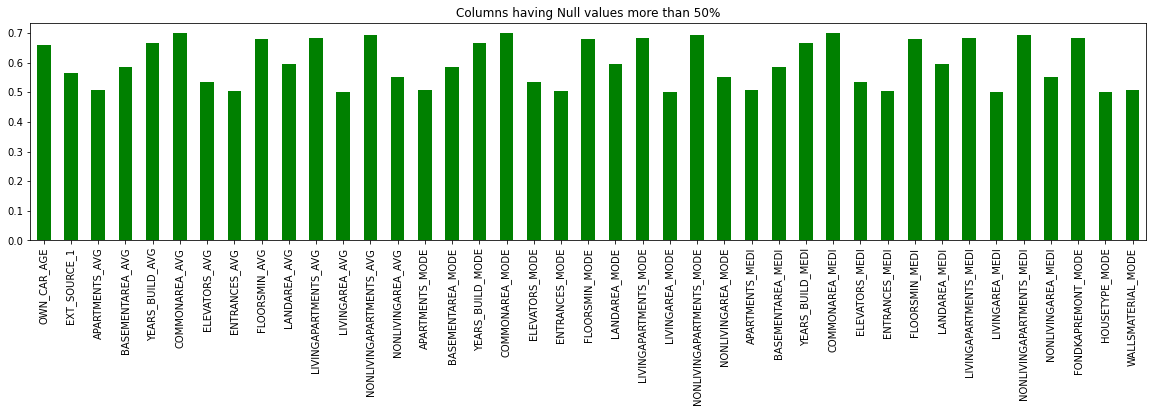

In [11]:
# View all columns with 50% or more null values
plt.figure(figsize=(20,4))
null_columns.plot(kind='bar',color="green")
plt.title('Columns having Null values more than 50%')
plt.show()

In [12]:
#Check dataframe before dropping:
app_data.shape

(307511, 122)

In [13]:
# Drop above columns having null values greater than 50%
null_columns_list=list(null_columns.index)
app_data.drop(labels=null_columns_list,axis=1,inplace=True)

In [14]:
#Check dataframe after dropping:
app_data.shape

(307511, 81)

In [15]:
#Analyse missing value remaining after dropping
app_data.isna().sum()/len(app_data.index)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [16]:
#Get column name having null values less than or equal to 13%
null_columns_13=app_data.isna().sum()/len(app_data.index)*100
null_columns_13=null_columns_13[null_columns_13.values < 13]
null_columns_13=null_columns_13[null_columns_13.values > 0]
null_columns_13

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
NAME_TYPE_SUITE             0.420148
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

## Let's analyse these column one by one.

### Analyse each column missing value, outliers & suggest method of imputation for missing values

In [17]:
def boxplot_analysis(data,title,column):
    sns.boxplot(data[column])
    plt.title(title, fontsize=20)
    plt.xlabel(column, fontsize=15)
    plt.show()
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerwhisker=(Q1 - 1.5 * IQR)
    upperwhisker=(Q3 + 1.5 * IQR)
    print("Values above {} are outliers".format(upperwhisker))

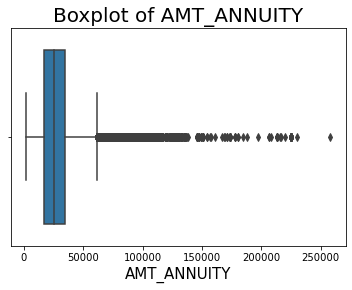

Values above 61704.0 are outliers


In [18]:
#Analyse AMT_ANNUNITY column
boxplot_analysis(data=app_data,title="Boxplot of AMT_ANNUITY", column='AMT_ANNUITY')

### As AMT_ANNUNITY has large number of outliers so instead of mean, using median is a good option for missing values

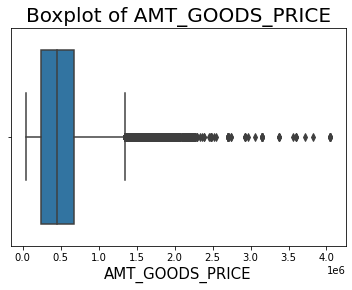

Values above 1341000.0 are outliers


In [19]:
#Analyse AMT_GOODS_PRICE column
boxplot_analysis(data=app_data,title="Boxplot of AMT_GOODS_PRICE", column='AMT_GOODS_PRICE')

### As AMT_GOODS_PRICE has large number of outliers ,median can be used for missing values

In [20]:
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

### NAME_TYPE_SUITE is categorical column, so missing value can be replaced with most used value i.e.  'Unaccompanied'

In [21]:
app_data.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

### CNT_FAM_MEMBERS column can't take decimal values as it is count of family member, can be treated as categorical and missing values can be replaced by mode of column i.e. 2.0

In [22]:
app_data.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [23]:
app_data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

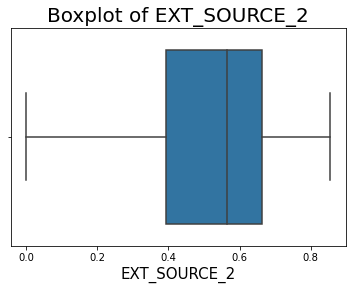

Values above 1.0703566001060345 are outliers


In [24]:
#Analyse EXT_SOURCE_2 column
boxplot_analysis(data=app_data,title="Boxplot of EXT_SOURCE_2", column='EXT_SOURCE_2')

In [25]:
app_data.EXT_SOURCE_2.mean()

0.5143926741308463

### As EXT_SOURCE_2 does not have outliers, so mean 0.514 can be used to replace missing values

In [26]:
#Analyse OBS_30_CNT_SOCIAL_CIRCLE column
app_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

### OBS_30_CNT_SOCIAL_CIRCLE has maximum value of 348 which is clearly an outlier as it is not possible for a client to have so many defaulters in his social surroundings. Also it has mean as 1.42 & median as 0. 

In [27]:
# Removing rows having null values greater than or equal to 30%

nullrow = app_data.isnull().sum(axis=1)
nullrow = list(nullrow[nullrow.values>=0.3*len(app_data)].index)
app_data.drop(labels=nullrow,axis=0,inplace=True)
print(len(nullrow))

0


In [28]:
# We will remove columns from this dataset that are not necessary

drop_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_data.drop(labels=drop_cols,axis=1,inplace=True)

#####  some columns have the value mentioned as 'XNA' which means 'Not Available'. So we need to find the number of rows and columns and implement techniques on them to fill those missing values or to delete them.

In [29]:
# Gender column categorical has these 'XNA' values

print("Shape : ", app_data[app_data['CODE_GENDER']=='XNA'].shape)
print("Counts of each category :\n",app_data['CODE_GENDER'].value_counts())

Shape :  (4, 51)
Counts of each category :
 F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


In [30]:
# Organization column categorical has these 'XNA' values

print("Shape : ", app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape)
print("Information of each category :\n",app_data['ORGANIZATION_TYPE'].describe())

Shape :  (55374, 51)
Information of each category :
 count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object


##### We observe that the Female category is the majority and only 4 rows have NA values, we can update those columns with Gender 'F' and there will be less impact on the dataset as a whole

In [31]:
# Replacing values in column 'CODE_GENDER' "XNA" with "F" for the dataset as mode of "F" is higher than "M"

app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

##### In column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. 
##### Which means 18% of the column is having this values.

In [32]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column.

app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 51)

In [33]:
app_data.AMT_INCOME_TOTAL.describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

### Binning

##### Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [34]:
app_data.AMT_INCOME_TOTAL.describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

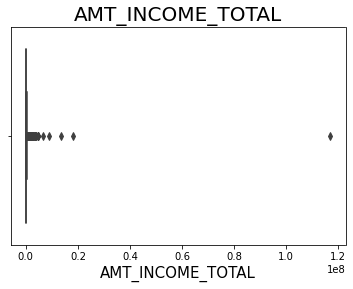

Values above 360000.0 are outliers


In [35]:
# Using boxplot to build bins and the categories

boxplot_analysis(data=app_data,title="AMT_INCOME_TOTAL", column='AMT_INCOME_TOTAL')

In [36]:
# Creating bins for AMT_INCOME_TOTAL

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data['AMT_INCOME_TOTAL_CAT'] = pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [37]:
app_data.AMT_CREDIT.describe()

count    2.521370e+05
mean     6.113985e+05
std      4.065272e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

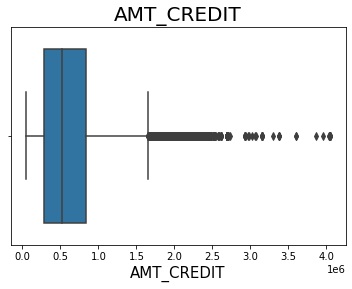

Values above 1656105.75 are outliers


In [38]:
# Using boxplot to build bins and the categories


boxplot_analysis(data=app_data,title="AMT_CREDIT", column='AMT_CREDIT')

In [39]:
# Creating bins for AMT_CREDIT

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data['AMT_CREDIT_CAT']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)

### Data Analysis

0    91.340025
1     8.659975
Name: TARGET, dtype: float64


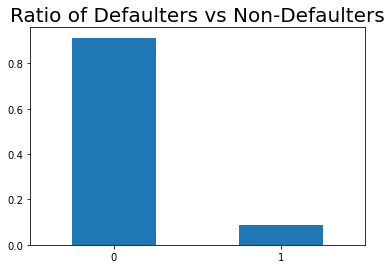

In [40]:
# Analyse Target variable
print(100*app_data.TARGET.value_counts()/ len(app_data))
(app_data.TARGET.value_counts()/ len(app_data)).plot.bar()
plt.xticks(rotation=0)
plt.title('Ratio of Defaulters vs Non-Defaulters', fontsize=20)
plt.show()

#### Divide the Data

- 1: Defaulters (i.e.,client with payment difficulties)
- 0: Non-Defaulters (i.e.,all other cases)

In [41]:
# Dividing the dataset into two datasets of target=1(customer with defaults) and target=0(all other)

ad_0 = app_data.loc[app_data["TARGET"]==0]
ad_1 = app_data.loc[app_data["TARGET"]==1]

In [42]:
ad_0.shape

(230302, 53)

In [43]:
ad_1.shape

(21835, 53)

In [44]:
# Calculating Imbalance percentage

100*app_data.TARGET.value_counts(normalize=True)

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

In [45]:
# Imbalance Ratio

round(len(ad_0)/len(ad_1),2)

10.55

### Univariate analysis of Categorical Data

#### Doing Categorical Analysis for target=0(client with no payment difficulties)

In [46]:
def plot_def(df,col,title,plottype,hue =None):

    
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] =20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 20
    
    if plottype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,15))
        ax[0].set_title(title)
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title(title)
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
    
    if plottype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        plt.xticks(rotation=45)
        plt.yscale('log')
        plt.title(title)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette = "GnBu") 
    else:
        exit
        
    plt.show()

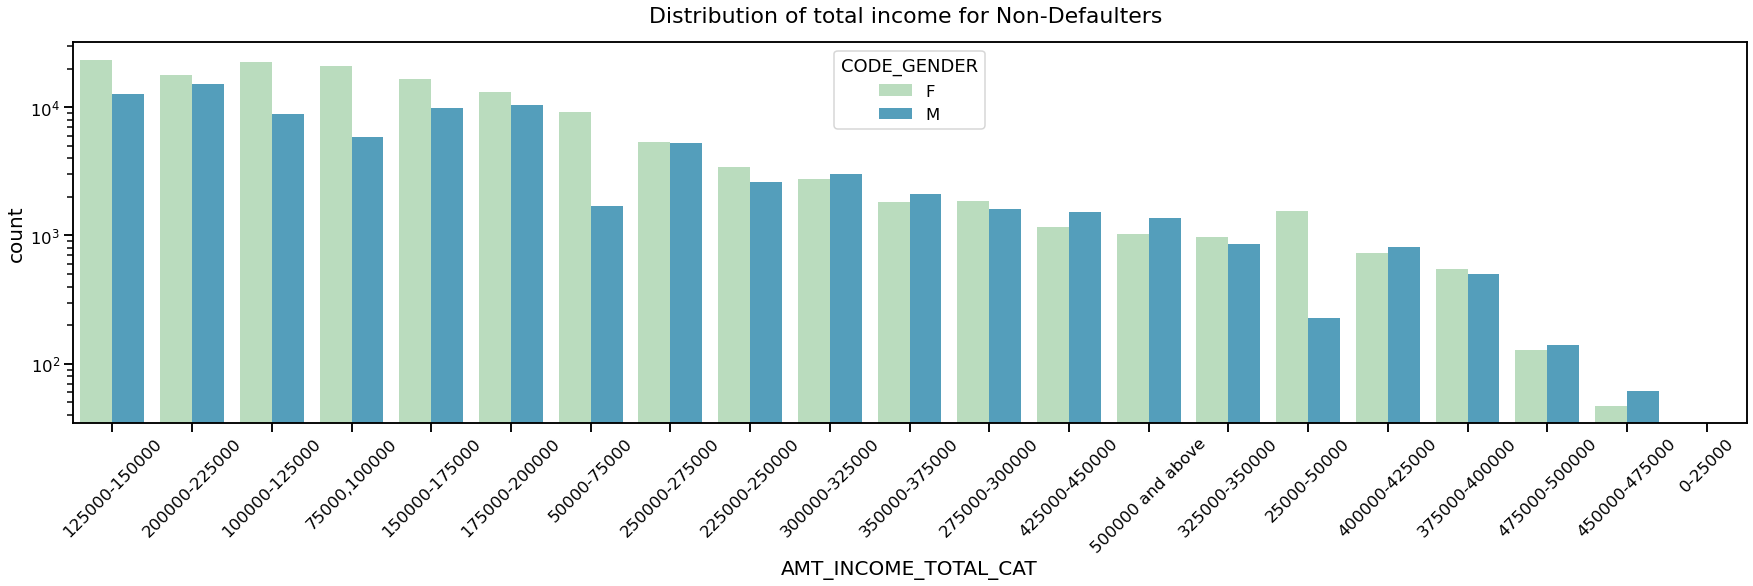

In [47]:
# PLotting for AMT_INCOME_TOTAL_CAT

plot_def(ad_0,col='AMT_INCOME_TOTAL_CAT',title='Distribution of total income for Non-Defaulters ',plottype = 1,hue='CODE_GENDER')

#### Inferences:
- For Non-Defaulters, Female counts are higher than male.
- Income range from 75000 to 225000 is having a greater number of credits.
- Females have more credits for above range than males
- Highest income group of males and females are 200000-225000 & 125000-150000 respectively

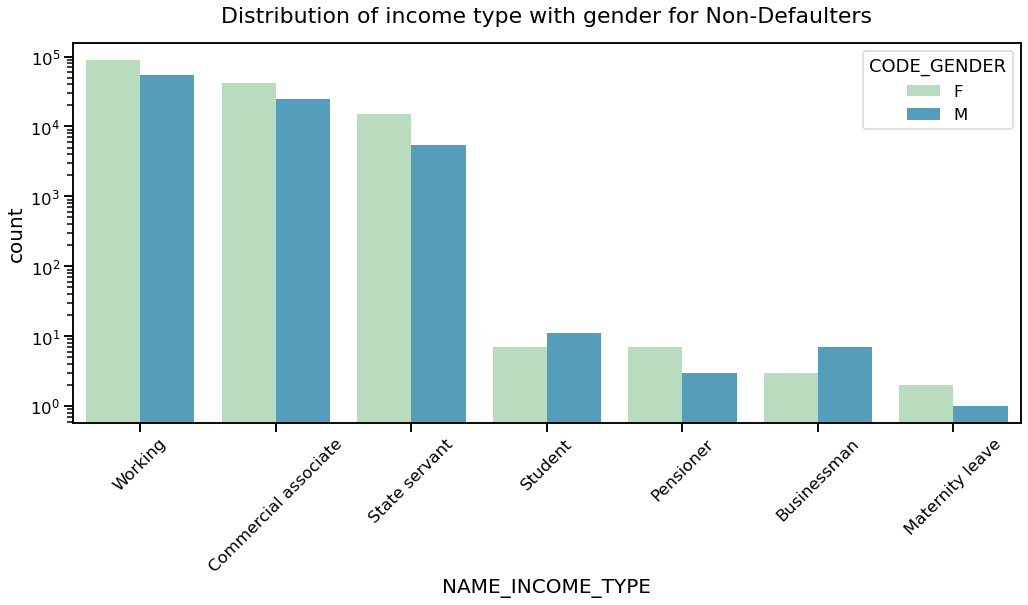

In [48]:
# PLotting for NAME_INCOME_TYPE

plot_def(ad_0,col='NAME_INCOME_TYPE',title='Distribution of income type with gender for Non-Defaulters',plottype = 1,hue='CODE_GENDER')

#### Inferences:

- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
- For The above three mentioned categories, Females are having more number of credits than male.
- Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

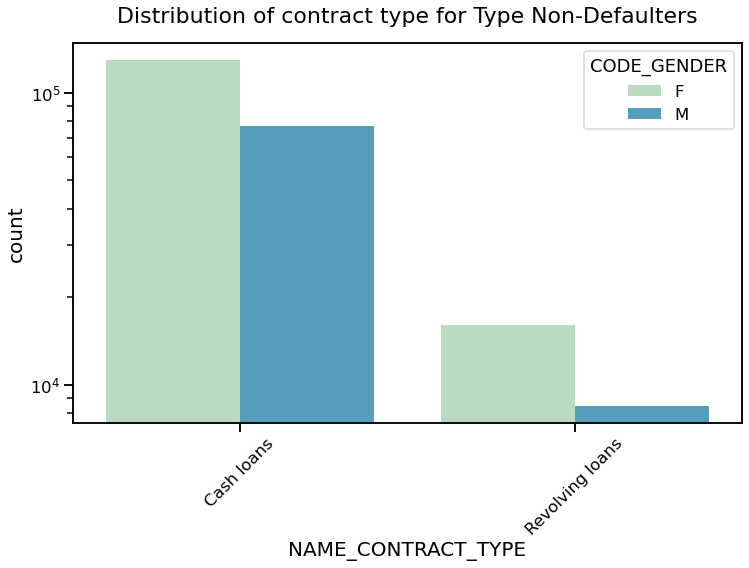

In [49]:
# PLotting for NAME_CONTRACT_TYPE

plot_def(ad_0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type for Type Non-Defaulters',plottype = 1,hue='CODE_GENDER')

#### Inferences:

- Female counts are very high as compared to male.
- ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.

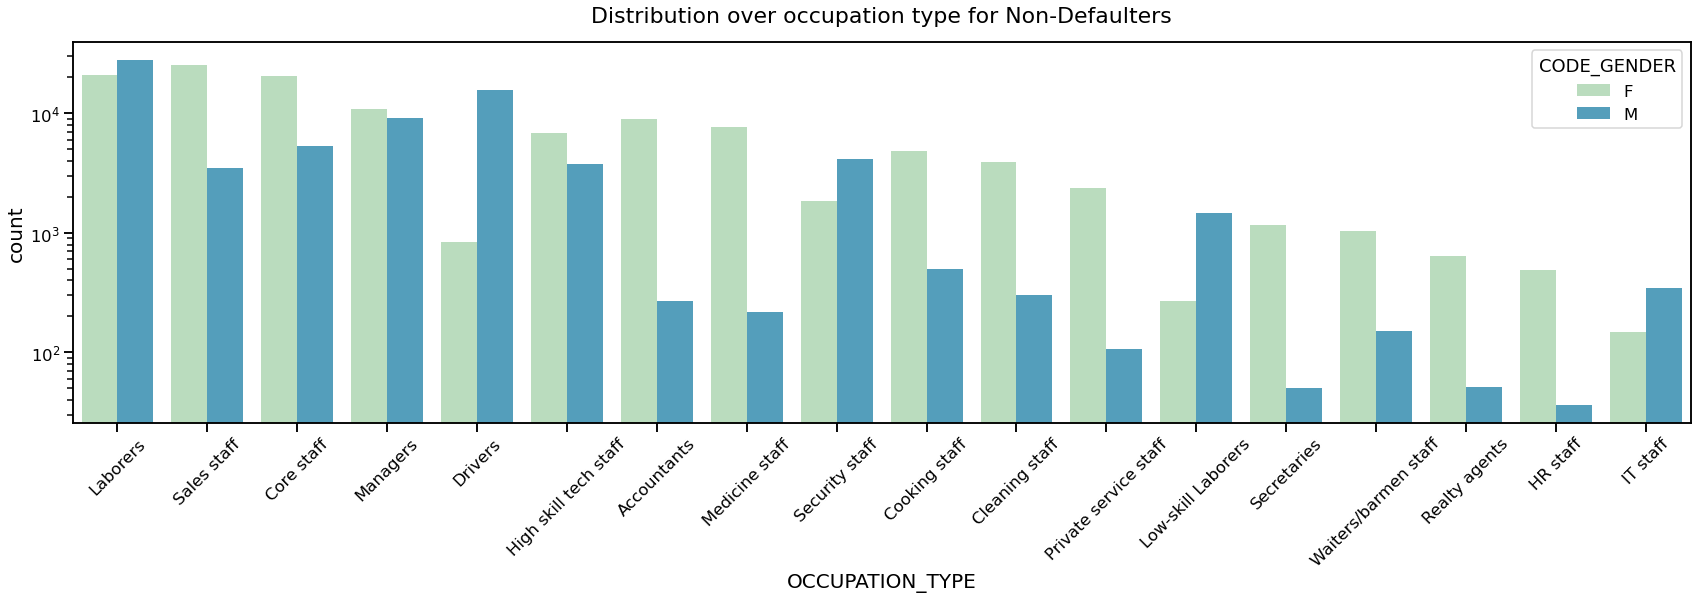

In [50]:
# PLotting for OCCUPATION_TYPE

plot_def(ad_0,col='OCCUPATION_TYPE',title='Distribution over occupation type for Non-Defaulters',plottype = 1,hue='CODE_GENDER')

#### Inferences :

- Female counts are very less as compared to male in the 'drivers' and 'Low-skill laborers'.
- Female counts are very high as compared to male in the 'Secretaries' and 'HR staff'.

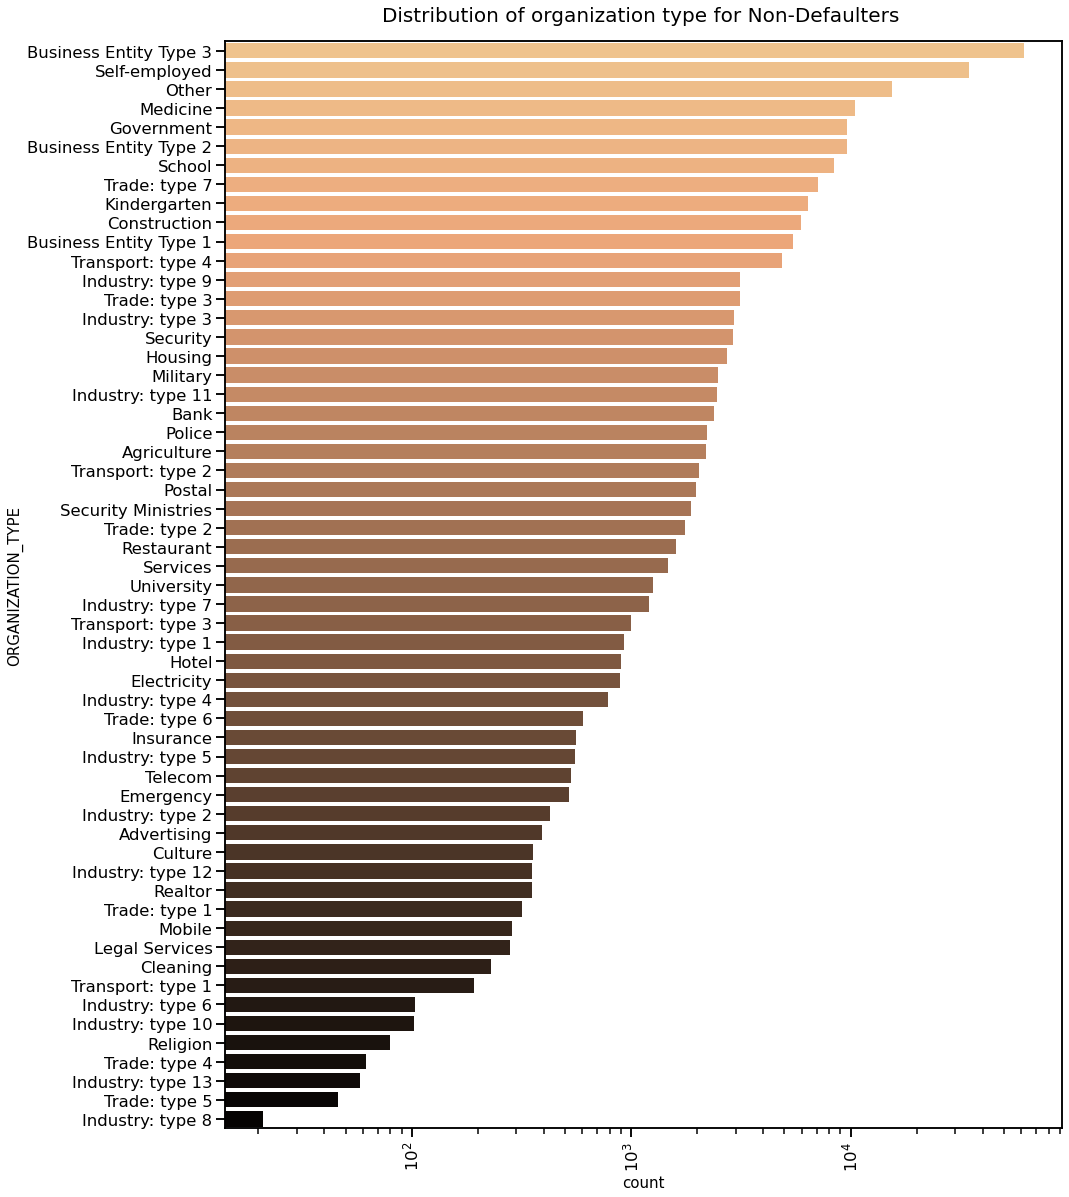

In [51]:
# PLotting for ORGANIZATION_TYPE

sns.set_context('talk')
plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 20

plt.title("Distribution of organization type for Non-Defaulters ")

plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=ad_0,y='ORGANIZATION_TYPE',order=ad_0['ORGANIZATION_TYPE'].value_counts().index,palette='copper_r')

plt.show()

#### Inferences:

- Business Entity Type 3 and Self-employed are the categories which have applied for the credits higher than any others.
- Industry:type 8 and Trade:type 5 are less in number of applications.

In [52]:
# Finding correlation for numerical columns for both TARGET-0 and TARGET-1 

target0_corr = ad_0.iloc[0:,2:]
target1_corr = ad_1.iloc[0:,2:]

target0 = target0_corr.corr(method='pearson')
target1 = target1_corr.corr(method='pearson')

In [53]:
# Correlation for target 0

target0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                      1.000000         -0.009826   -0.018704   
AMT_INCOME_TOTAL                 -0.009826          1.000000    0.326155   
AMT_CREDIT                       -0.018704          0.326155    1.000000   
AMT_ANNUITY                      -0.007619          0.400757    0.762117   
AMT_GOODS_PRICE                  -0.022286          0.333312    0.986726   
REGION_POPULATION_RELATIVE       -0.030352          0.169306    0.103876   
DAYS_BIRTH                        0.242462         -0.045543   -0.152659   
DAYS_EMPLOYED                     0.063036         -0.030102   -0.087500   
DAYS_REGISTRATION                 0.162900          0.034508   -0.015180   
DAYS_ID_PUBLISH                  -0.117746         -0.026462   -0.034914   
HOUR_APPR_PROCESS_START          -0.033031          0.055934    0.040390   
REG_REGION_NOT_LIVE_REGION       -0.023033          0.064868    0.020979   
REG_REGION_NOT_WORK_REGION       -0.016798          0.129765    0.050597   
LIVE_REGION_NOT_WORK_REGION      -0.006946          0.121288    0.052028   
REG_CITY_NOT_LIVE_CITY           -0.001566         -0.004264   -0.037527   
REG_CITY_NOT_WORK_CITY            0.010369         -0.020260   -0.038517   
LIVE_CITY_NOT_WORK_CITY           0.018414         -0.011238   -0.014834   
EXT_SOURCE_2                     -0.026134          0.137752    0.136033   
EXT_SOURCE_3                     -0.015157         -0.052724    0.056919   
YEARS_BEGINEXPLUATATION_AVG       0.009832          0.017919    0.005286   
FLOORSMAX_AVG                    -0.015253          0.181631    0.099310   
YEARS_BEGINEXPLUATATION_MODE      0.009014          0.017003    0.004092   
FLOORSMAX_MODE                   -0.014711          0.174367    0.096907   
YEARS_BEGINEXPLUATATION_MEDI      0.009189          0.017880    0.004826   
FLOORSMAX_MEDI                   -0.014886          0.180239    0.098890   
TOTALAREA_MODE                   -0.012695          0.126655    0.069929   
OBS_30_CNT_SOCIAL_CIRCLE          0.019388         -0.030661   -0.003803   
DEF_30_CNT_SOCIAL_CIRCLE          0.003419         -0.027914   -0.022223   
OBS_60_CNT_SOCIAL_CIRCLE          0.019062         -0.030477   -0.003770   
DEF_60_CNT_SOCIAL_CIRCLE          0.002384         -0.027415   -0.024255   
AMT_REQ_CREDIT_BUREAU_HOUR       -0.001755          0.001375   -0.004400   
AMT_REQ_CREDIT_BUREAU_DAY         0.000170          0.009130    0.005392   
AMT_REQ_CREDIT_BUREAU_WEEK       -0.001397          0.006816   -0.003026   
AMT_REQ_CREDIT_BUREAU_MON        -0.021331          0.057193    0.052167   
AMT_REQ_CREDIT_BUREAU_QRT        -0.003161          0.012069    0.018479   
AMT_REQ_CREDIT_BUREAU_YEAR       -0.032376          0.025002   -0.051741   

                              AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    -0.007619        -0.022286   
AMT_INCOME_TOTAL                 0.400757         0.333312   
AMT_CREDIT                       0.762117         0.986726   
AMT_ANNUITY                      1.000000         0.766945   
AMT_GOODS_PRICE                  0.766945         1.000000   
REGION_POPULATION_RELATIVE       0.122223         0.107026   
DAYS_BIRTH                      -0.091573        -0.146827   
DAYS_EMPLOYED                   -0.052469        -0.088638   
DAYS_REGISTRATION                0.009813        -0.011845   
DAYS_ID_PUBLISH                 -0.025990        -0.036697   
HOUR_APPR_PROCESS_START          0.034044         0.049994   
REG_REGION_NOT_LIVE_REGION       0.039764         0.023520   
REG_REGION_NOT_WORK_REGION       0.076067         0.052065   
LIVE_REGION_NOT_WORK_REGION      0.071648         0.052349   
REG_CITY_NOT_LIVE_CITY          -0.018908        -0.036954   
REG_CITY_NOT_WORK_CITY          -0.028969        -0.039259   
LIVE_CITY_NOT_WORK_CITY         -0.014264        -0.015809   
EXT_SOURCE_2                     0.126985         0.142505   
EXT_SOURCE_3                     0.0468

In [54]:
# Correlation for target 1

target1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                      1.000000          0.001872   -0.002074   
AMT_INCOME_TOTAL                  0.001872          1.000000    0.036484   
AMT_CREDIT                       -0.002074          0.036484    1.000000   
AMT_ANNUITY                       0.015653          0.043358    0.748708   
AMT_GOODS_PRICE                  -0.007711          0.036097    0.982799   
REGION_POPULATION_RELATIVE       -0.032019          0.008476    0.069220   
DAYS_BIRTH                        0.176563         -0.007822   -0.189512   
DAYS_EMPLOYED                     0.032627         -0.000039   -0.106003   
DAYS_REGISTRATION                 0.126411         -0.003959   -0.033250   
DAYS_ID_PUBLISH                  -0.089861         -0.008858   -0.062405   
HOUR_APPR_PROCESS_START          -0.038923          0.012520    0.029054   
REG_REGION_NOT_LIVE_REGION       -0.032465          0.006951    0.020083   
REG_REGION_NOT_WORK_REGION       -0.039498          0.013245    0.035695   
LIVE_REGION_NOT_WORK_REGION      -0.028031          0.012287    0.035966   
REG_CITY_NOT_LIVE_CITY           -0.019278         -0.003664   -0.035325   
REG_CITY_NOT_WORK_CITY           -0.000876         -0.006886   -0.041392   
LIVE_CITY_NOT_WORK_CITY           0.016332         -0.004401   -0.017875   
EXT_SOURCE_2                     -0.010600          0.006201    0.126885   
EXT_SOURCE_3                     -0.000029         -0.013841    0.086877   
YEARS_BEGINEXPLUATATION_AVG       0.007447          0.001790    0.006722   
FLOORSMAX_AVG                    -0.019302          0.009706    0.094355   
YEARS_BEGINEXPLUATATION_MODE      0.006904          0.001671    0.000636   
FLOORSMAX_MODE                   -0.018586          0.009233    0.091322   
YEARS_BEGINEXPLUATATION_MEDI      0.007124          0.001788    0.005761   
FLOORSMAX_MEDI                   -0.018952          0.009595    0.094332   
TOTALAREA_MODE                   -0.015902          0.006203    0.066701   
OBS_30_CNT_SOCIAL_CIRCLE          0.028712         -0.005866    0.015835   
DEF_30_CNT_SOCIAL_CIRCLE          0.002959         -0.005849   -0.031869   
OBS_60_CNT_SOCIAL_CIRCLE          0.027955         -0.005765    0.016319   
DEF_60_CNT_SOCIAL_CIRCLE         -0.003220         -0.005282   -0.035170   
AMT_REQ_CREDIT_BUREAU_HOUR       -0.002160          0.000506   -0.007747   
AMT_REQ_CREDIT_BUREAU_DAY        -0.010219         -0.000456   -0.003064   
AMT_REQ_CREDIT_BUREAU_WEEK       -0.008425         -0.000003    0.009905   
AMT_REQ_CREDIT_BUREAU_MON        -0.019714          0.003554    0.059205   
AMT_REQ_CREDIT_BUREAU_QRT        -0.016997         -0.001496   -0.014755   
AMT_REQ_CREDIT_BUREAU_YEAR       -0.028892          0.000634   -0.039210   

                              AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                     0.015653        -0.007711   
AMT_INCOME_TOTAL                 0.043358         0.036097   
AMT_CREDIT                       0.748708         0.982799   
AMT_ANNUITY                      1.000000         0.749379   
AMT_GOODS_PRICE                  0.749379         1.000000   
REGION_POPULATION_RELATIVE       0.074406         0.076277   
DAYS_BIRTH                      -0.090497        -0.185578   
DAYS_EMPLOYED                   -0.049032        -0.111933   
DAYS_REGISTRATION                0.014302        -0.032070   
DAYS_ID_PUBLISH                 -0.044289        -0.064713   
HOUR_APPR_PROCESS_START          0.022524         0.042276   
REG_REGION_NOT_LIVE_REGION       0.033311         0.023552   
REG_REGION_NOT_WORK_REGION       0.063242         0.039425   
LIVE_REGION_NOT_WORK_REGION      0.061609         0.038486   
REG_CITY_NOT_LIVE_CITY          -0.013834        -0.035628   
REG_CITY_NOT_WORK_CITY          -0.019728        -0.041534   
LIVE_CITY_NOT_WORK_CITY         -0.006806        -0.017099   
EXT_SOURCE_2                     0.120642         0.137711   
EXT_SOURCE_3                     0.0528

In [55]:
#user defined function to plot correlation matrix

def target_corr_hmap(data,title):
    plt.figure(figsize=(55, 30))
    plt.rcParams['axes.titlesize'] = 40
    plt.rcParams['axes.titlepad'] = 50
    sns.heatmap(data, cmap="RdYlBu_r",annot=True)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

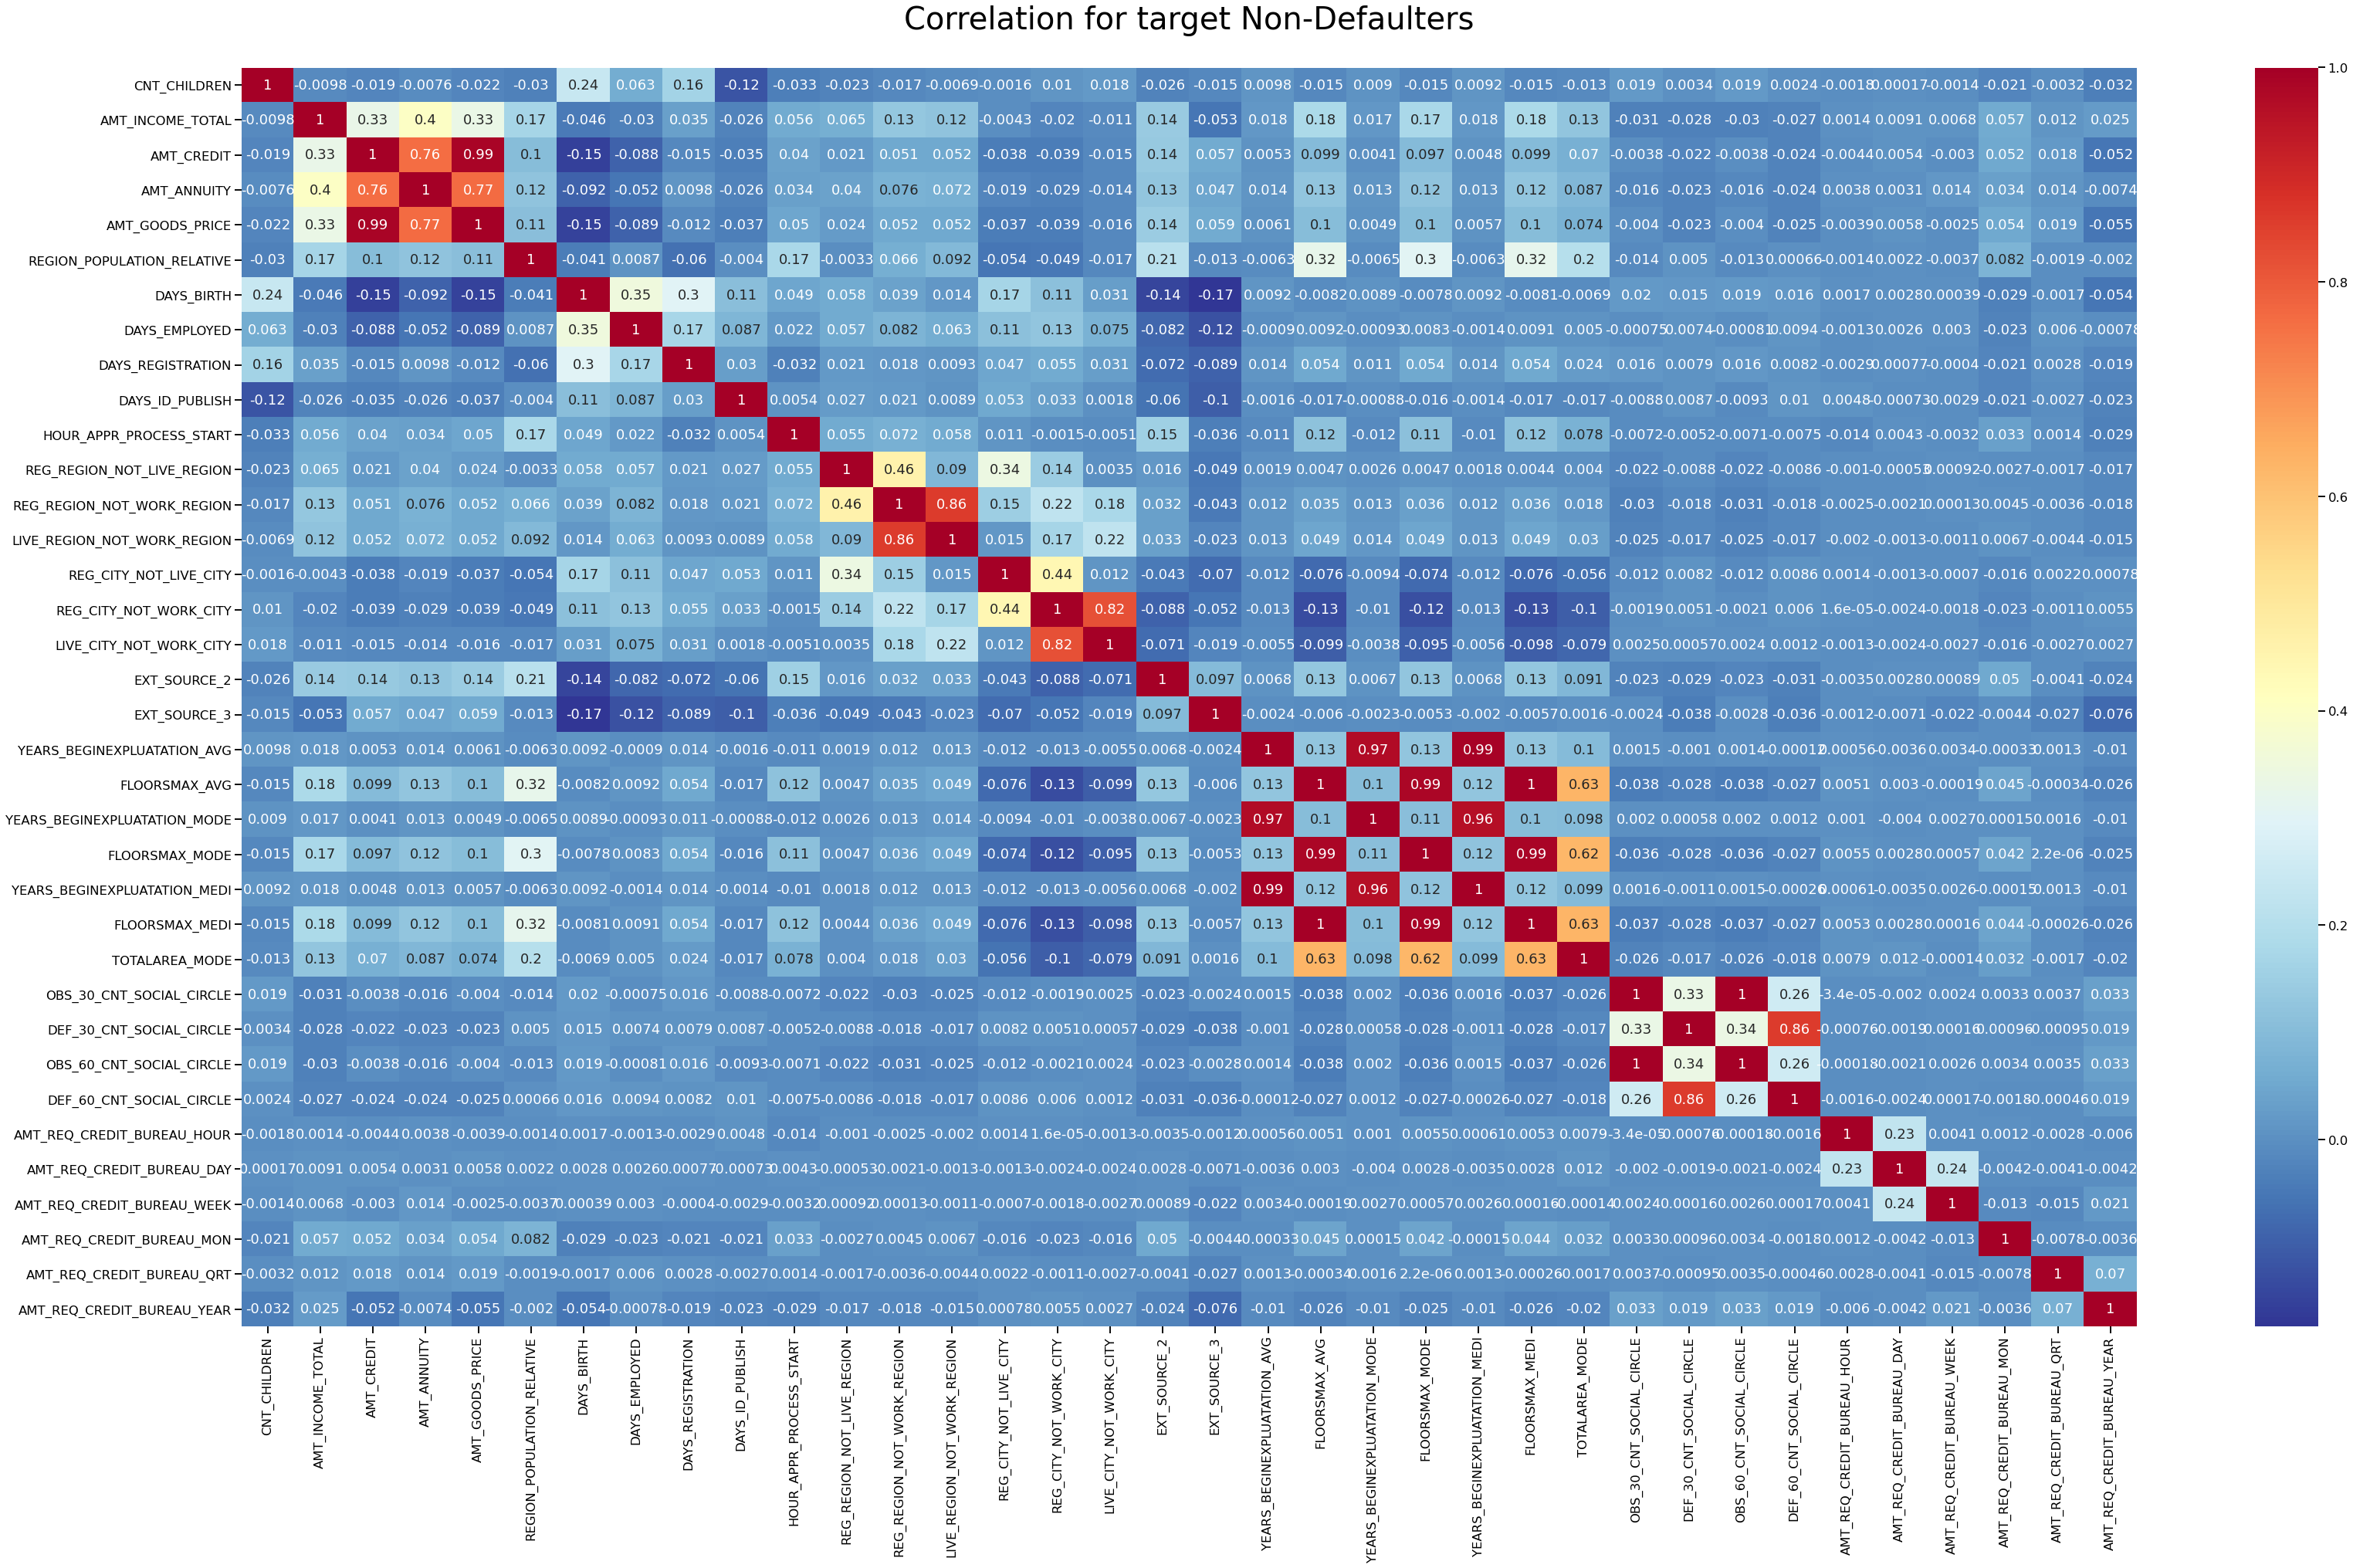

In [56]:
# For Target 0

target_corr_hmap(data=target0,title='Correlation for target Non-Defaulters')

#### Inferences:

- Credit amount is inversely proportional to age & number of children client have.
- Income amount is also inversely proportional to the number of children that client have.
- The income is higher in densely populated area.


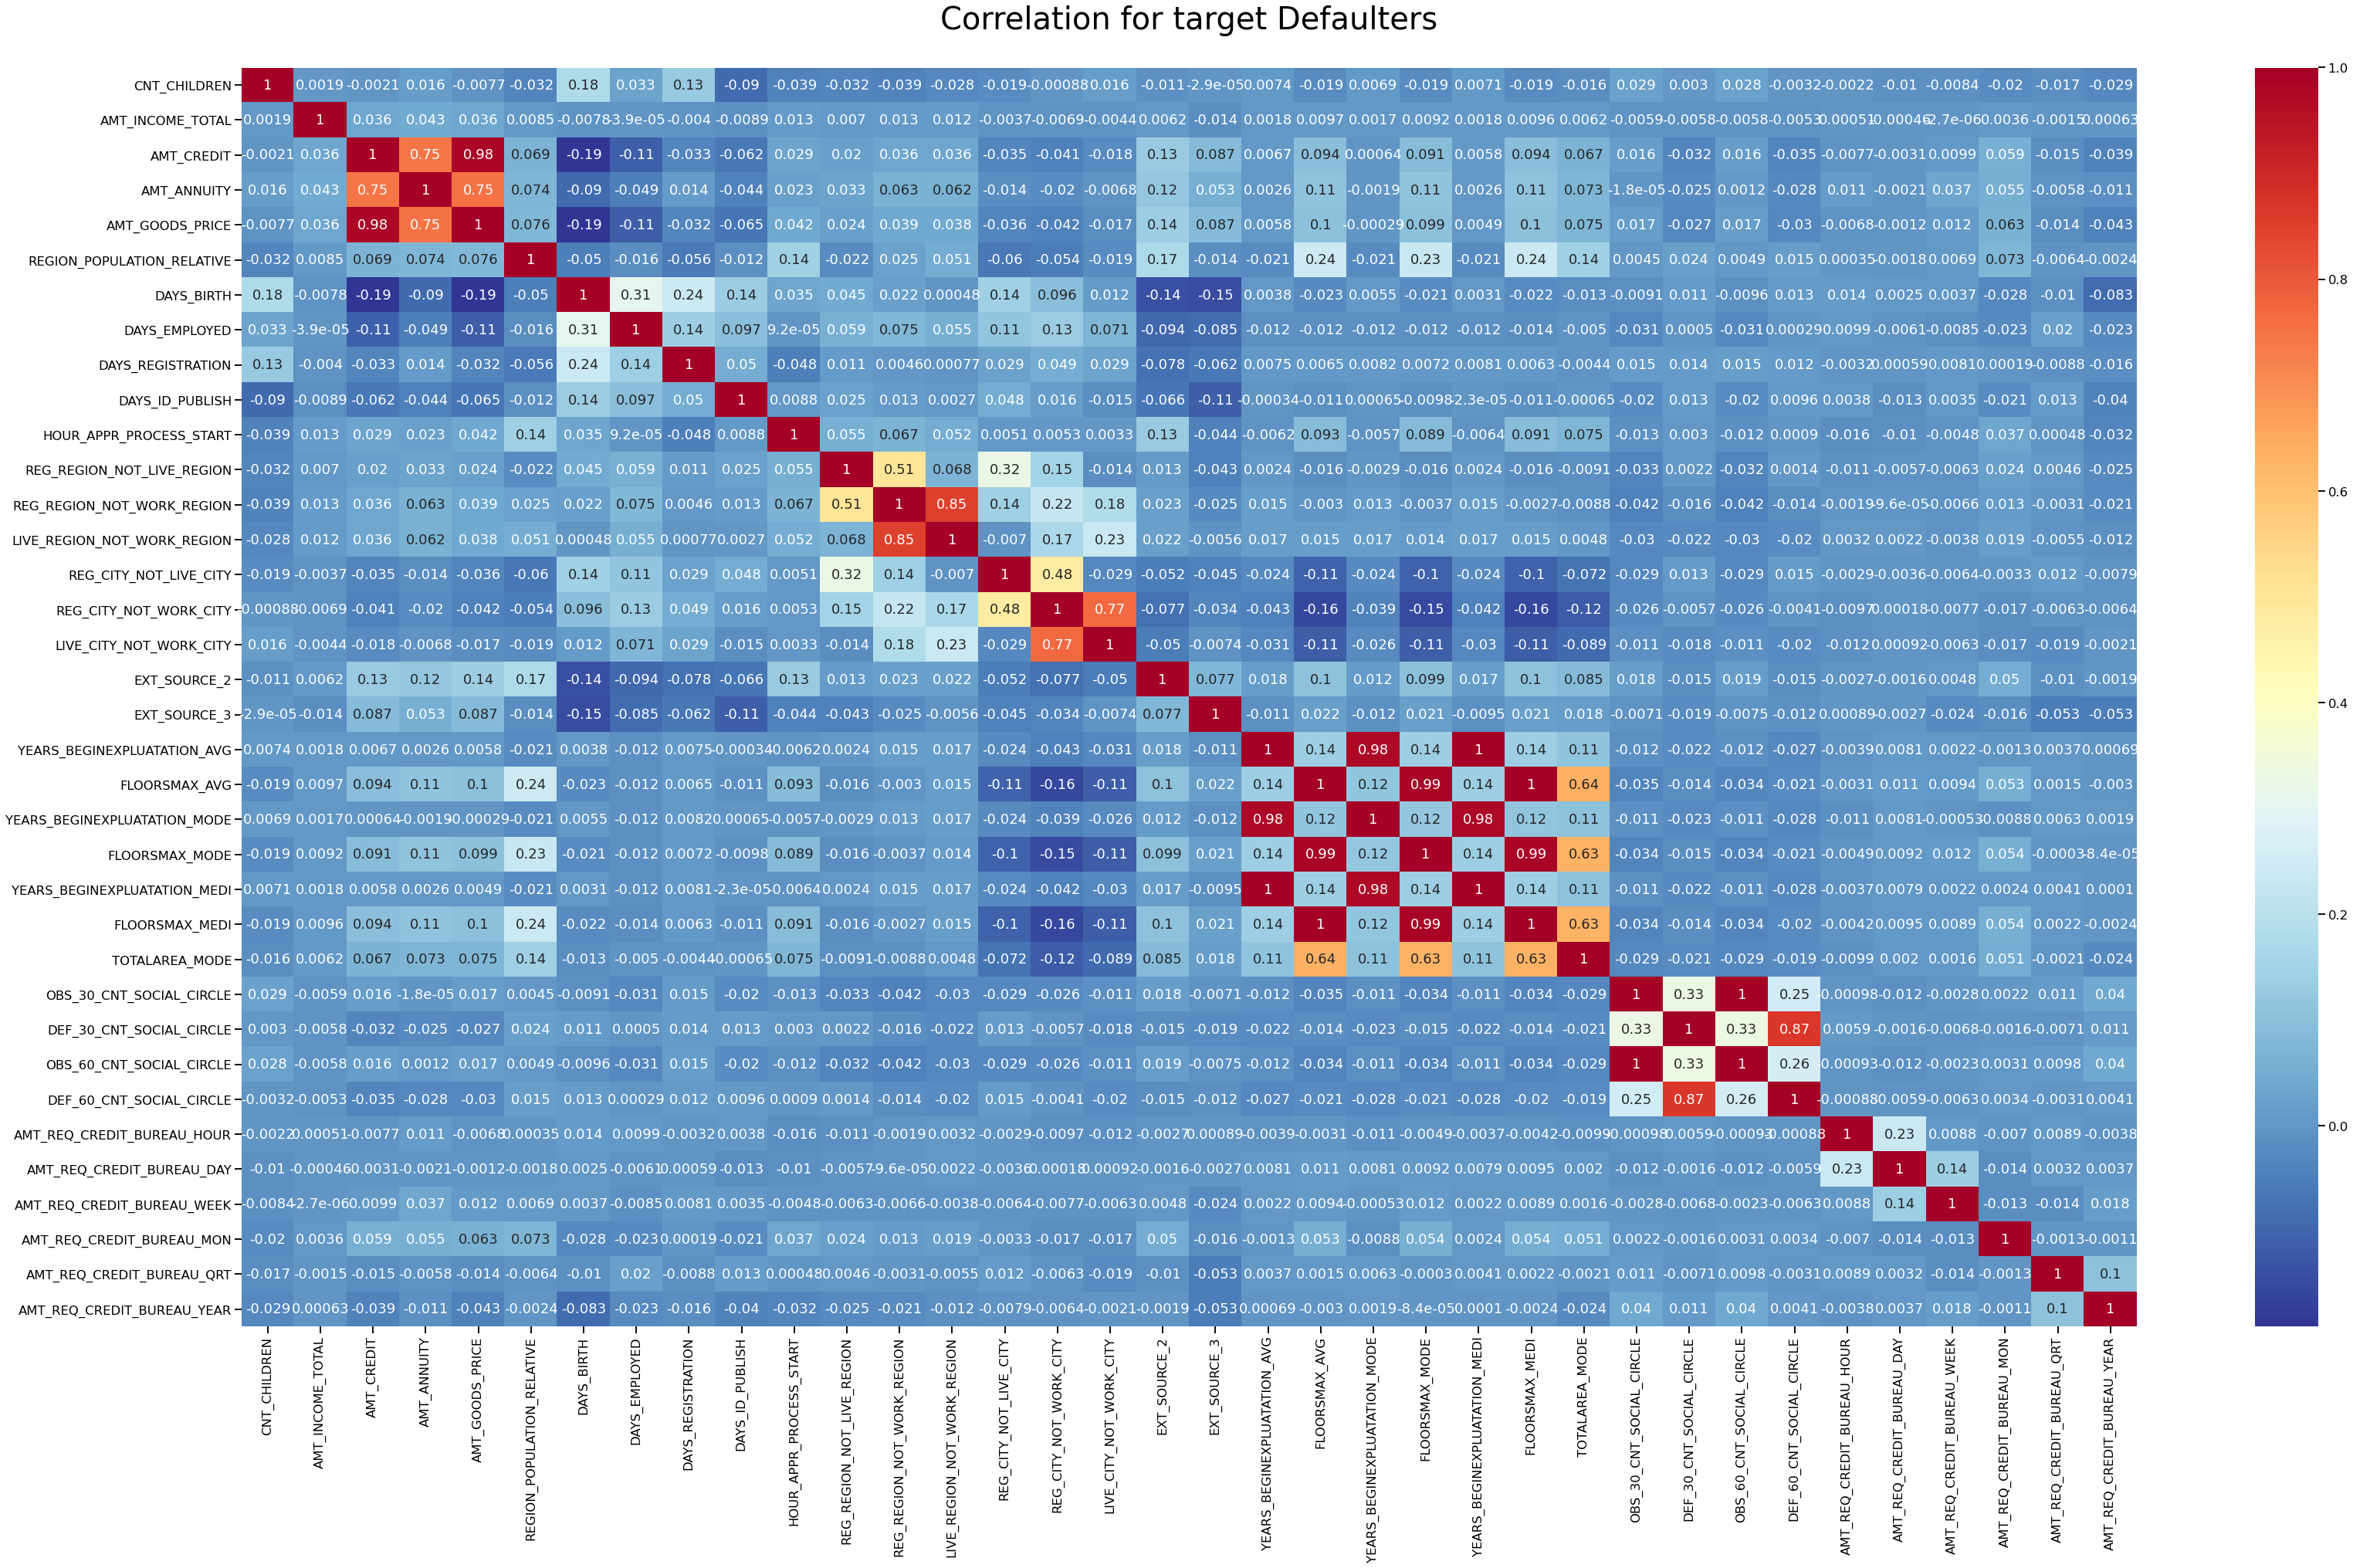

In [57]:
# For Target 1

target_corr_hmap(data=target1,title='Correlation for target Defaulters')

#### This heat map for Defaulters is also having quite a same observation just like Non-Defaulters. But for few points are different. They are listed below.

- Suppose clients permanent address is not same as work address, he/she is having less children & vice-versa the amount credited is less.

### Univariate analysis for continuous variables

##### Target-0 Ananlysis

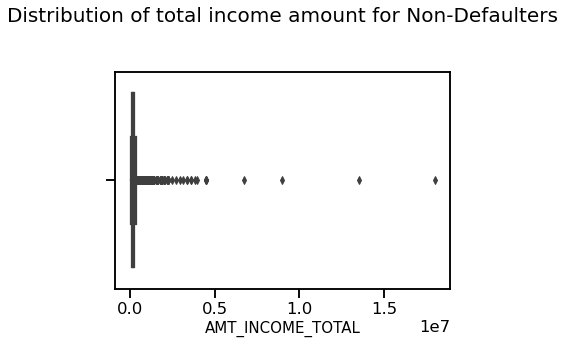

Values above 371250.0 are outliers


In [58]:
# Distribution of AMT_INCOME_TOTAL


boxplot_analysis(data=ad_0,title="Distribution of total income amount for Non-Defaulters", column='AMT_INCOME_TOTAL')

#### The third quartiles is very slim for income amount.

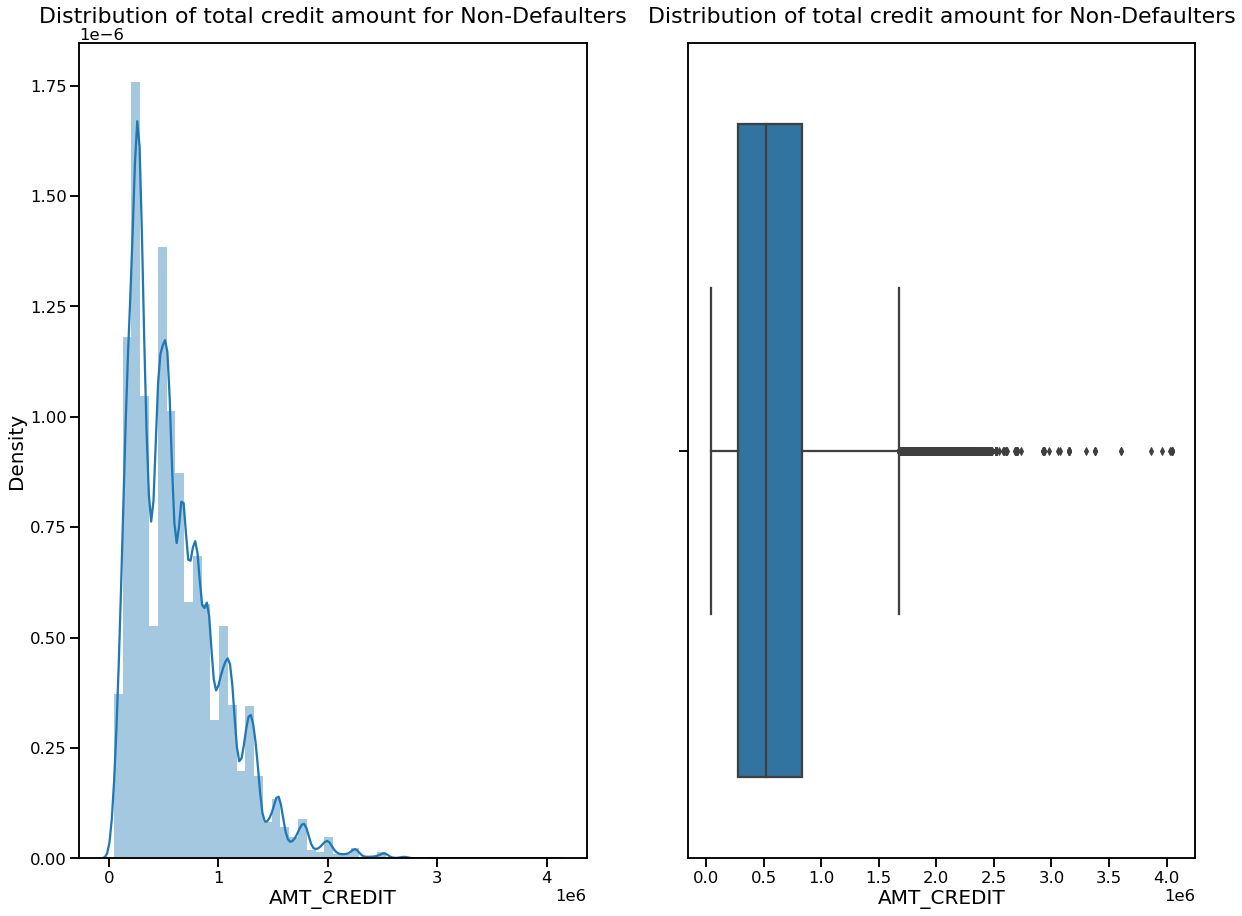

In [59]:
# PLotting for AMT_CREDIT

plot_def(ad_0,col='AMT_CREDIT',title='Distribution of total credit amount for Non-Defaulters',plottype = 0,hue='CODE_GENDER')

#### The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

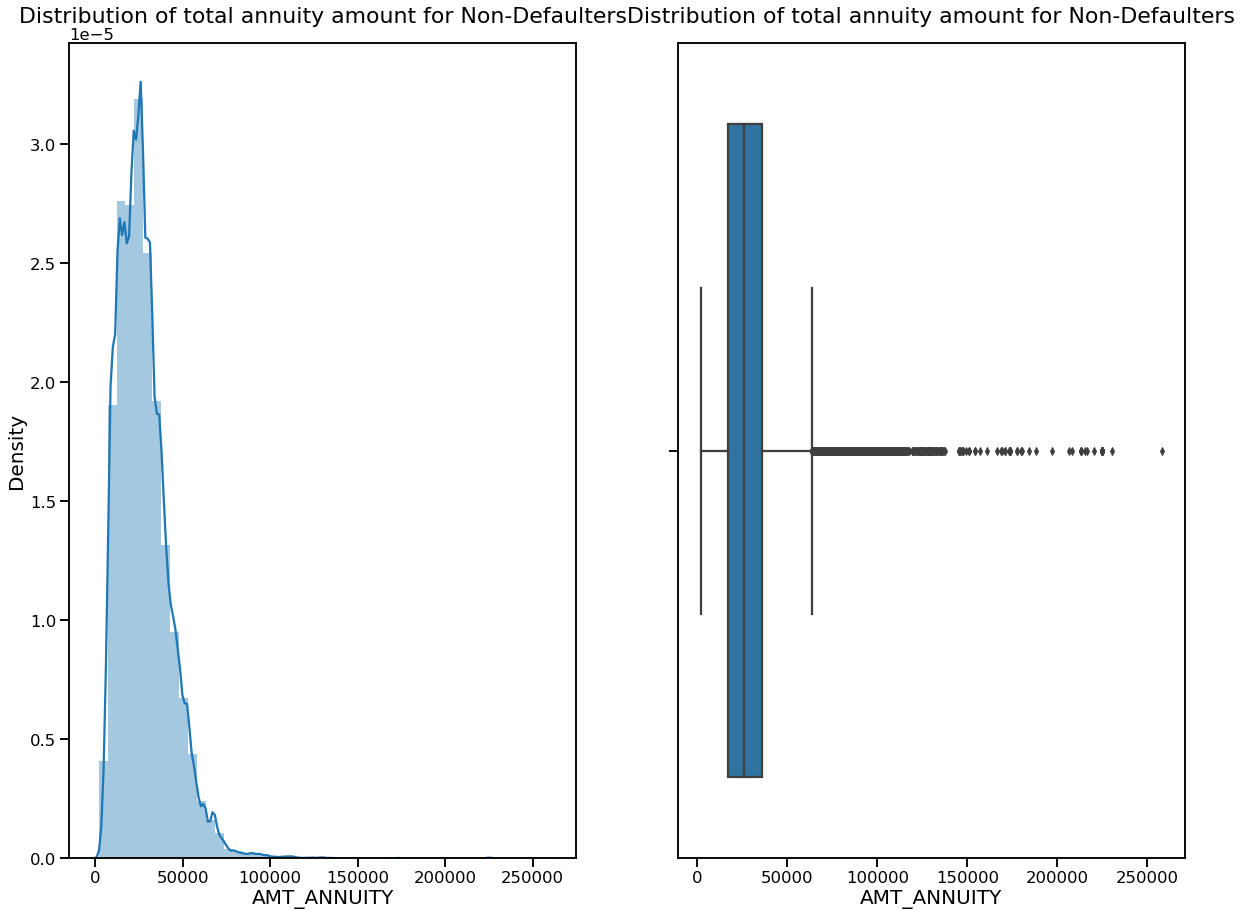

In [60]:
# PLotting for AMT_ANNUITY

plot_def(ad_0,col='AMT_ANNUITY',title='Distribution of total annuity amount for Non-Defaulters',plottype = 0,hue='CODE_GENDER')

#### The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

#### Target 1

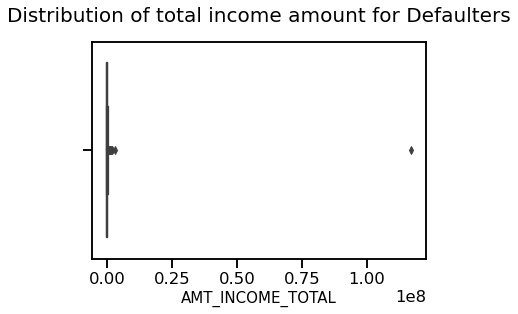

Values above 337500.0 are outliers


In [61]:
# PLotting for AMT_INCOME_TOTAL



boxplot_analysis(data=ad_1,title="Distribution of total income amount for Defaulters", column='AMT_INCOME_TOTAL')

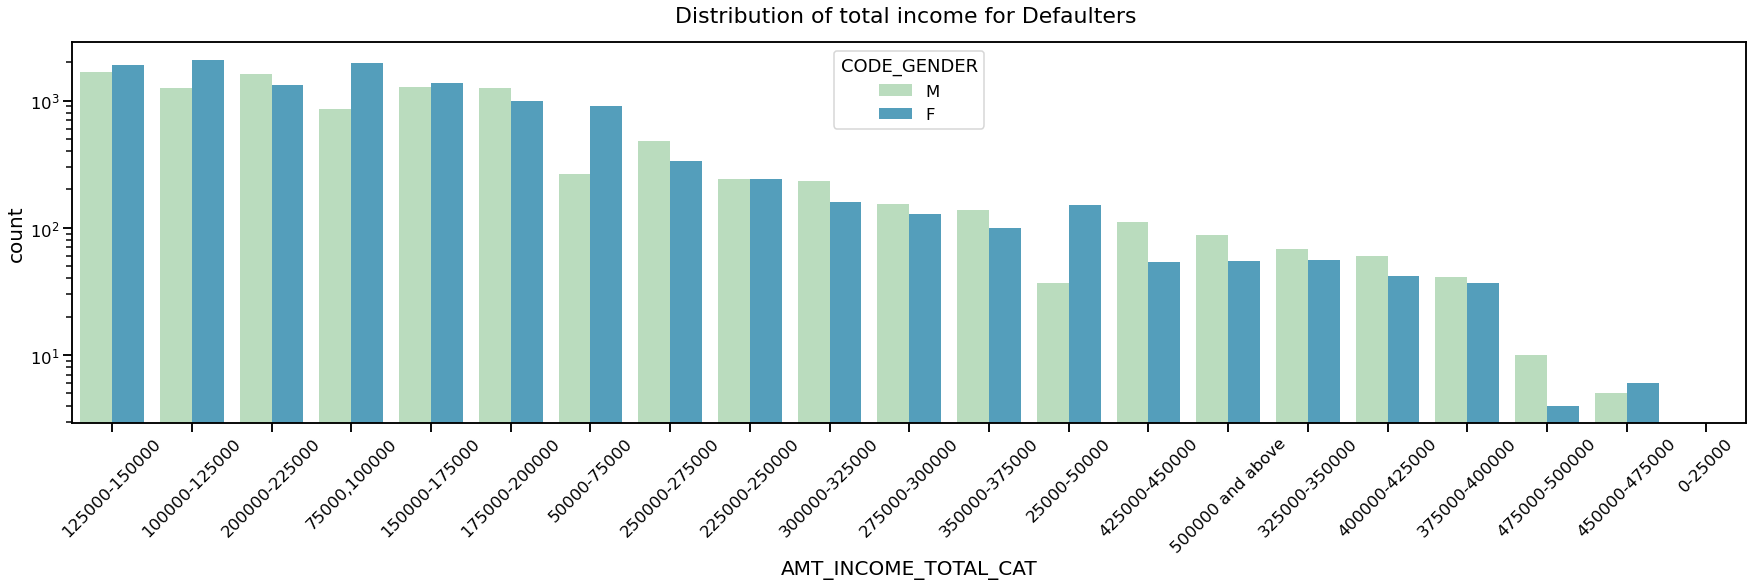

In [62]:
# PLotting for AMT_INCOME_TOTAL_CAT

plot_def(ad_1,col='AMT_INCOME_TOTAL_CAT',title='Distribution of total income for Defaulters ',plottype = 1,hue='CODE_GENDER')

#### Inferences:

- For Defaulters, Female counts are nearly equal for most of the categories as compared to male.
- Income range from 75000 to 125000 is having a greater number of credits.
- Lowest income ranges for males and females are 450000-475000  

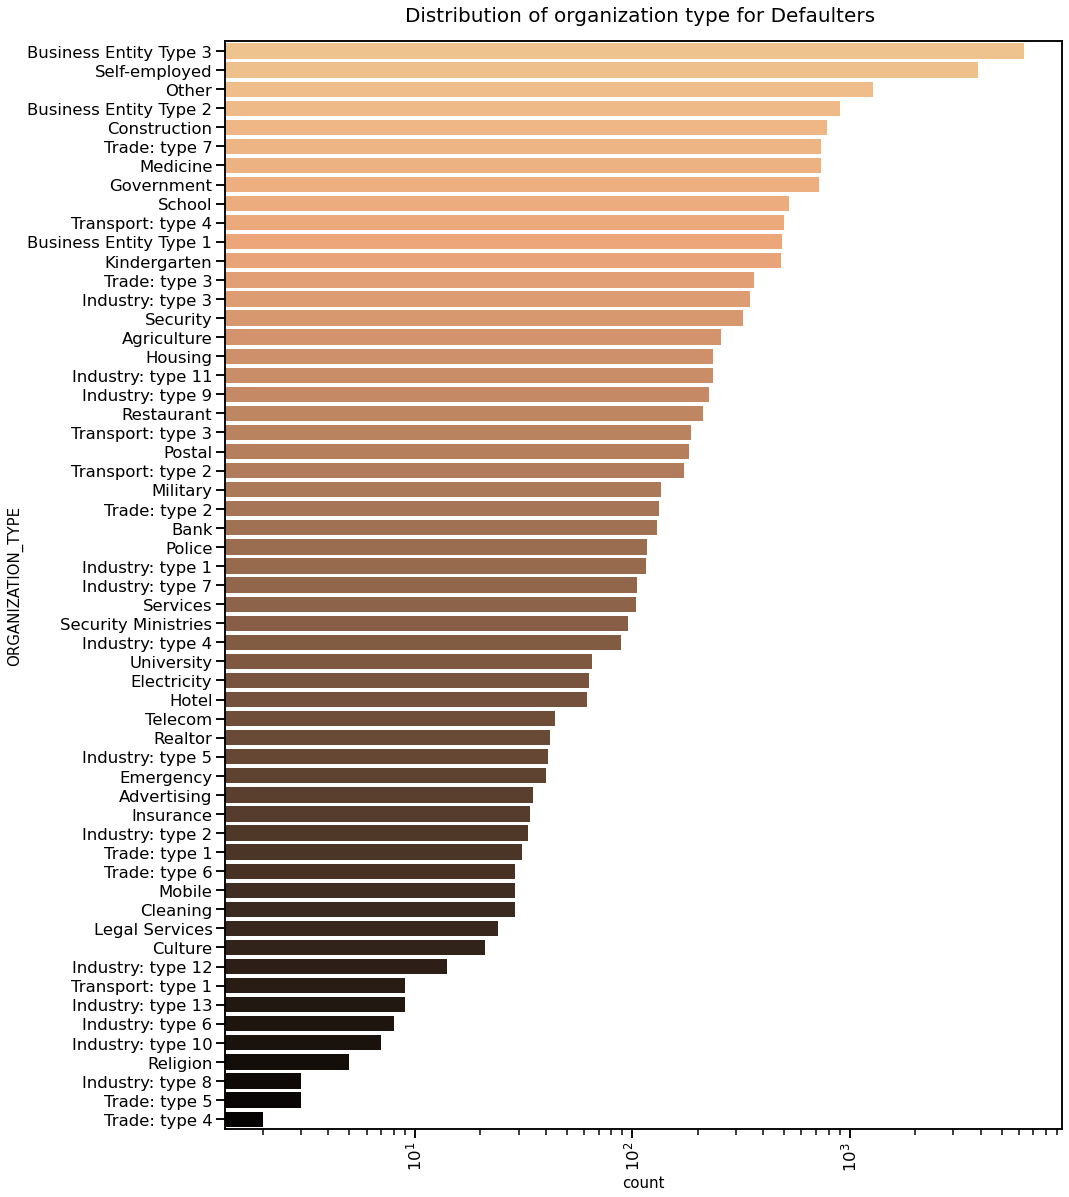

In [63]:
# PLotting for ORGANIZATION_TYPE

sns.set_context('talk')
plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 20

plt.title("Distribution of organization type for Defaulters ")

plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=ad_1,y='ORGANIZATION_TYPE',order=ad_1['ORGANIZATION_TYPE'].value_counts().index,palette='copper_r')

plt.show()

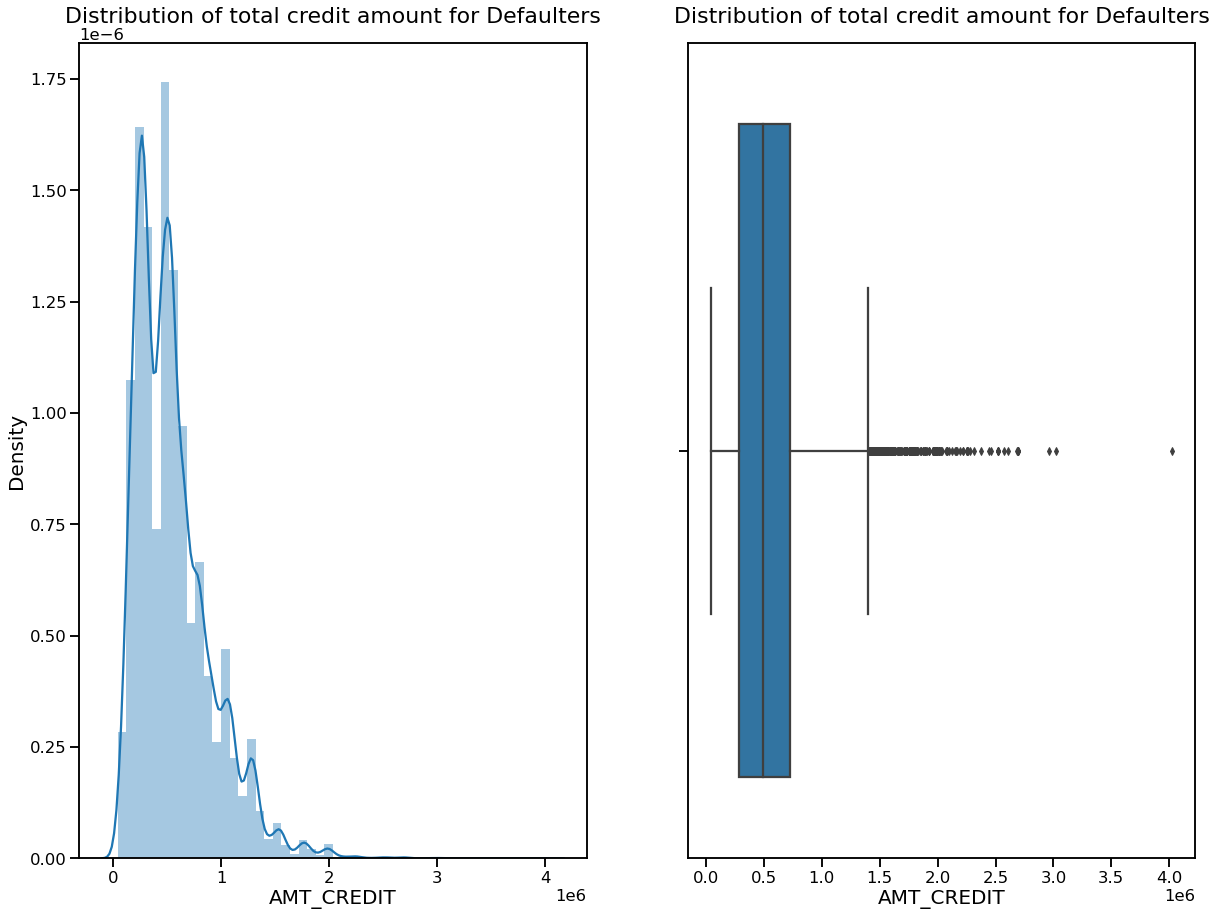

In [64]:
# PLotting for AMT_CREDIT

plot_def(ad_1,col='AMT_CREDIT',title='Distribution of total credit amount for Defaulters',plottype = 0,hue='CODE_GENDER')

#### The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

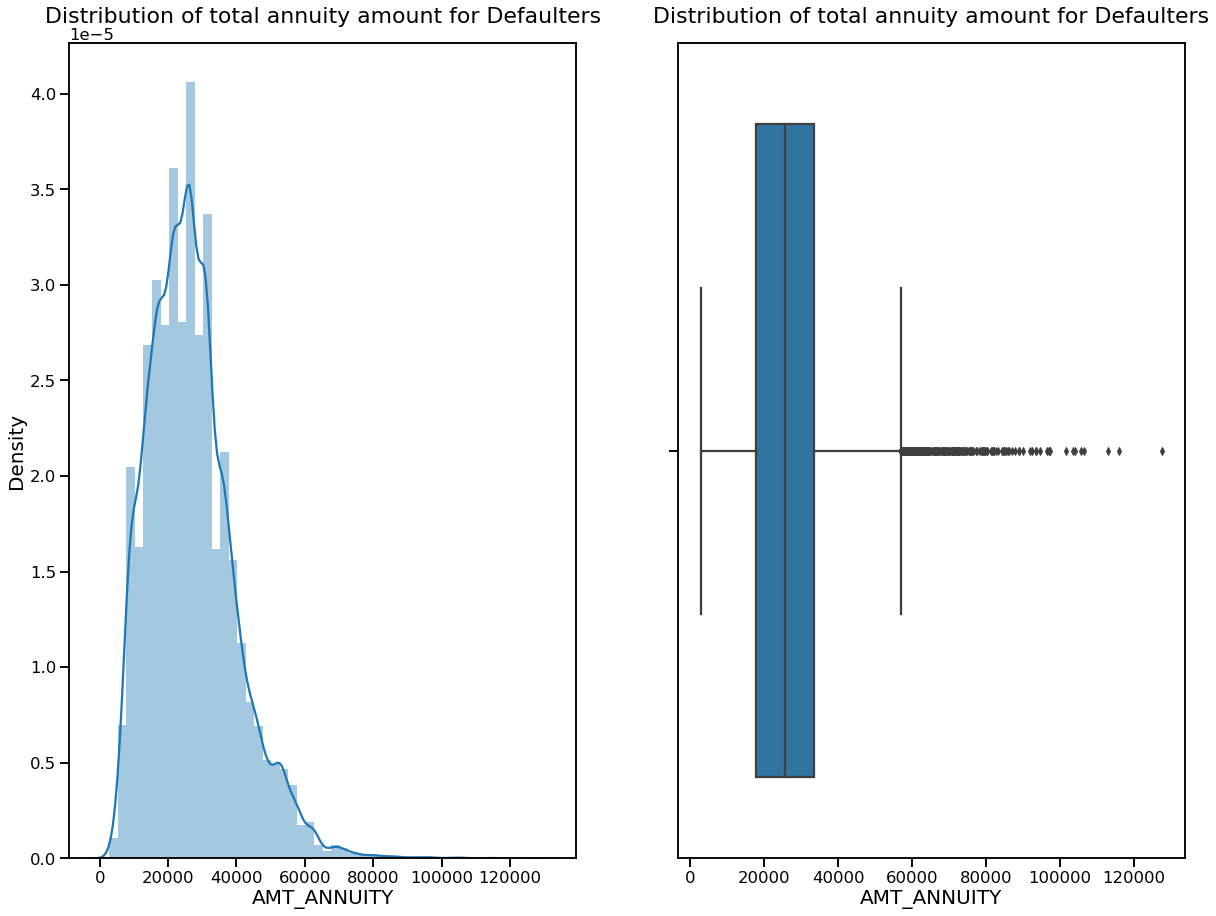

In [65]:
# PLotting for AMT_ANNUITY

plot_def(ad_1,col='AMT_ANNUITY',title='Distribution of total annuity amount for Defaulters',plottype = 0,hue='CODE_GENDER')

#### The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

### Bivariate analysis for variables



#### For Target-0

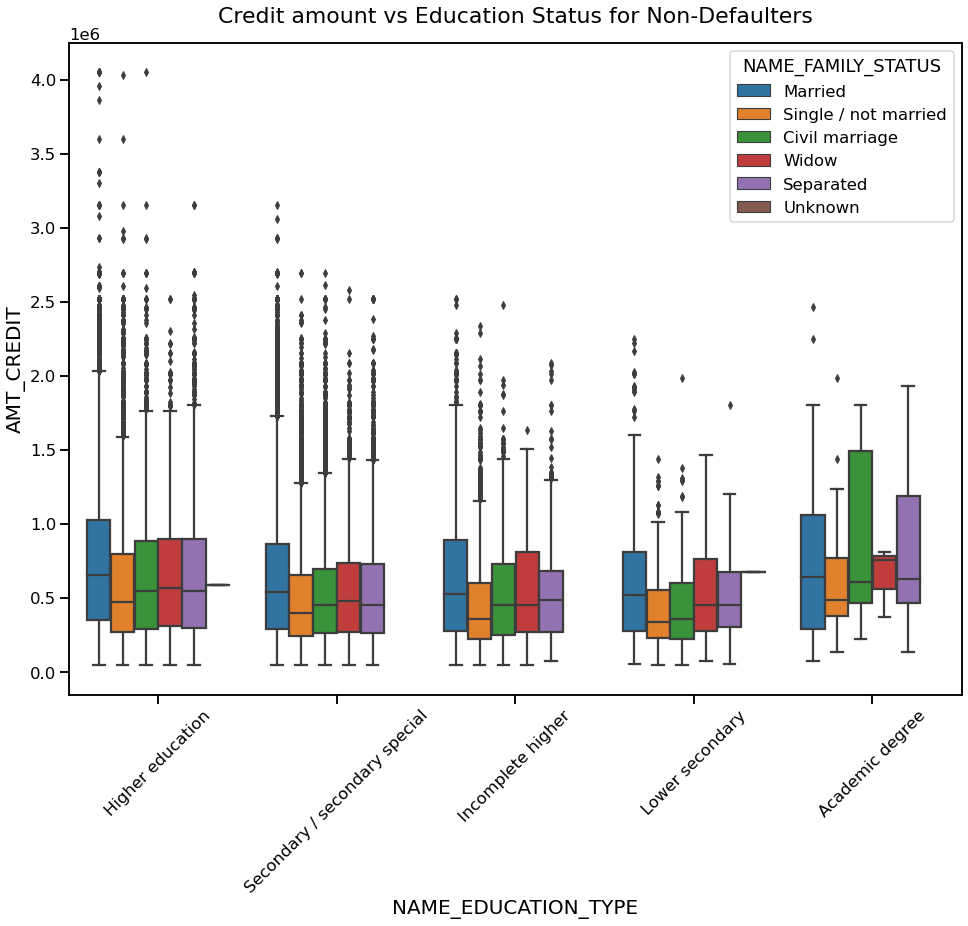

In [66]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =ad_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Non-Defaulters')
plt.show()

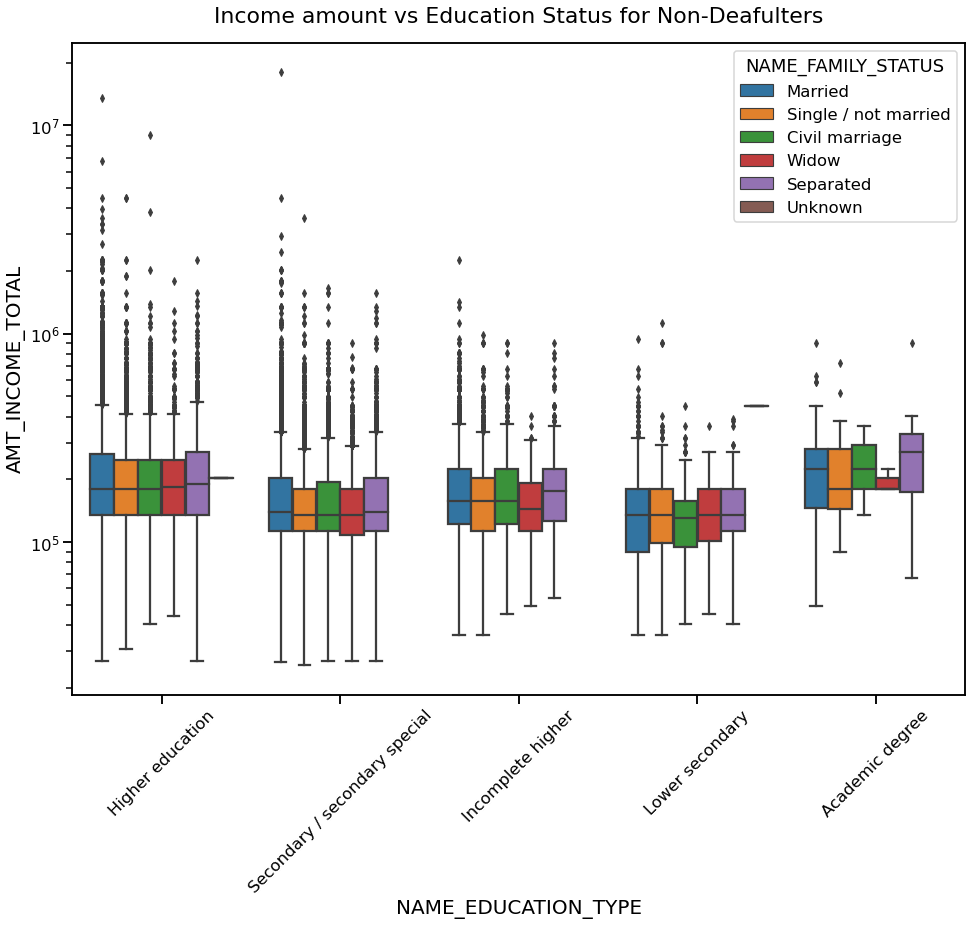

In [67]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =ad_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Non-Deafulters')
plt.show()

#### Inference

- The income amount of 'Higher education' is almost equal with family status and has many outliers. 
- Least number of outliers are present for Academic degree & the income amount is higher than that of Higher education. 
- when compared to others Lower secondary of civil marriage status have less income amount.

#### For Target 1

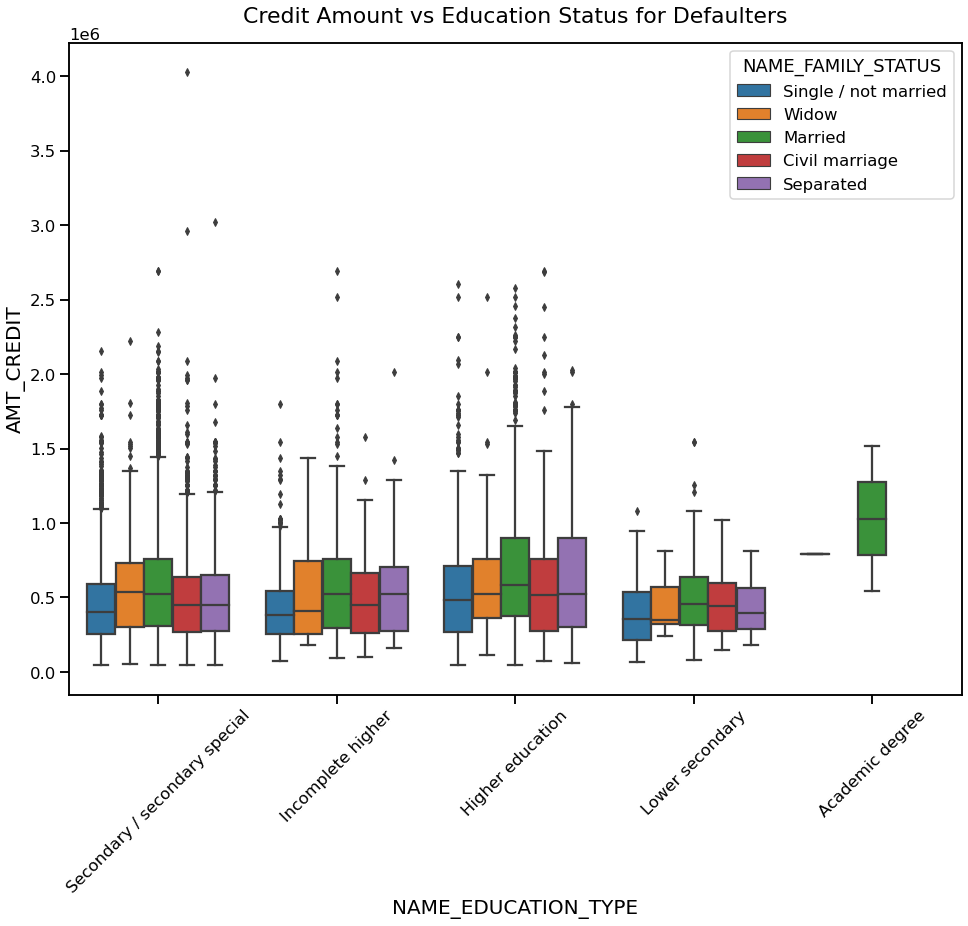

In [68]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =ad_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status for Defaulters')
plt.show()

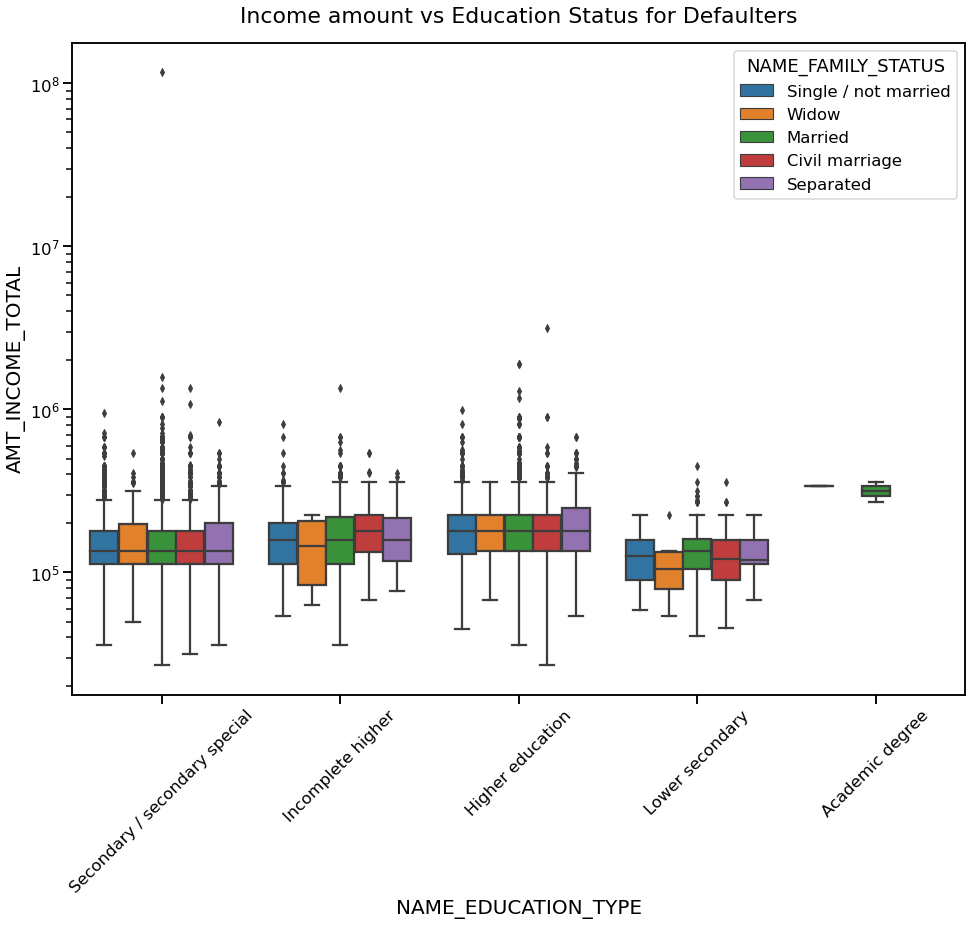

In [69]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =ad_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Defaulters')
plt.show()

#### Inference:
- Defaulters plot has some similarity with Non-Defaulters.
- The income amount for 'Higher education’ type & family status is almost equal. 
- The income amount is higher for Academic degree than Higher education , but there are minimum number of outliers.
- Lower secondary  have less income amount than others.
- More number of outliers are present for Married status people who are secondary/ secondary special qualified.


# Analysis with Previous Loan Application

### Reading Second Data file and perform Cleaning

In [70]:
pre_data = pd.read_csv("previous_application.csv")

In [71]:
nullcols_1 = pre_data.isnull().sum()
nullcols_1 = nullcols_1[nullcols_1.values>(0.5*len(nullcols_1))]
len(nullcols_1)

15

In [72]:
nullcols_1 = list(nullcols_1[nullcols_1.values >= 0.5].index)
pre_data.drop(labels = nullcols_1,axis=1,inplace=True)

pre_data.shape

(1670214, 22)

In [73]:
# Removing the column values of 'XNA' and 'XAP'
pre_data = pre_data .drop(pre_data [pre_data ['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_data  = pre_data .drop(pre_data [pre_data ['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_data  = pre_data .drop(pre_data [pre_data ['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

pre_data .shape

(69635, 22)

In [74]:
# Now merging the Application dataset with previous appliaction dataset

app_prev=pd.merge(left=app_data,right=pre_data,how='inner',on='SK_ID_CURR',suffixes='_o')
app_prev.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100034       0     Revolving loans           M            N   
1      100035       0          Cash loans           F            N   
2      100039       0          Cash loans           M            Y   
3      100046       0     Revolving loans           M            Y   
4      100046       0     Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY  \
0               Y             0           90000.0     180000.0       9000.0   
1               Y             0          292500.0     665892.0      24592.5   
2               N             1          360000.0     733315.5      39069.0   
3               Y             0          180000.0     540000.0      27000.0   
4               Y             0          180000.0     540000.0      27000.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         180000.0   Unaccompanied               Working   
1         477000.0   Unaccompanied  Commercial associate   
2         679500.0   Unaccompanied  Commercial associate   
3         540000.0   Unaccompanied               Working   
4         540000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755      -10341          -1010            -4799.0   
1                    0.025164      -15280          -2668            -5266.0   
2                    0.015221      -11694          -2060            -3557.0   
3                    0.025164      -16126          -1761            -8236.0   
4                    0.025164      -16126          -1761            -8236.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START_  \
0            -3015        Laborers                     TUESDAY   
1            -3787             NaN                   WEDNESDAY   
2            -3557         Drivers                    THURSDAY   
3            -4292        Managers                     TUESDAY   
4            -4292        Managers                     TUESDAY   

   HOUR_APPR_PROCESS_START_  REG_REGION_NOT_LIVE_REGION  \
0                        16                           0   
1                        13                           0   
2                        10                           0   
3                         8                           0   
4                         8                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       1                       1                        0   
3                       0                       0                        0   
4                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.502779           NaN   
1  Business Entity Type 3      0.479987      0.410103   
2           Self-employed      0.321745    

In [75]:
# Renaming the column names after merging

app_prev1 = app_prev.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [76]:
# Removing unwanted columns for analysis

app_prev1.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)



In [77]:
def plot_count(data,col,order,title,hue,palette):
               
    sns.set_style('darkgrid')
    sns.set_context('talk')

    plt.figure(figsize=(15,30))
    plt.xticks(rotation=90)
    plt.xscale('log')
    plt.title(title)
    ax = sns.countplot(data = data, y= col, order = order,hue = hue,palette=palette)
    plt.show()



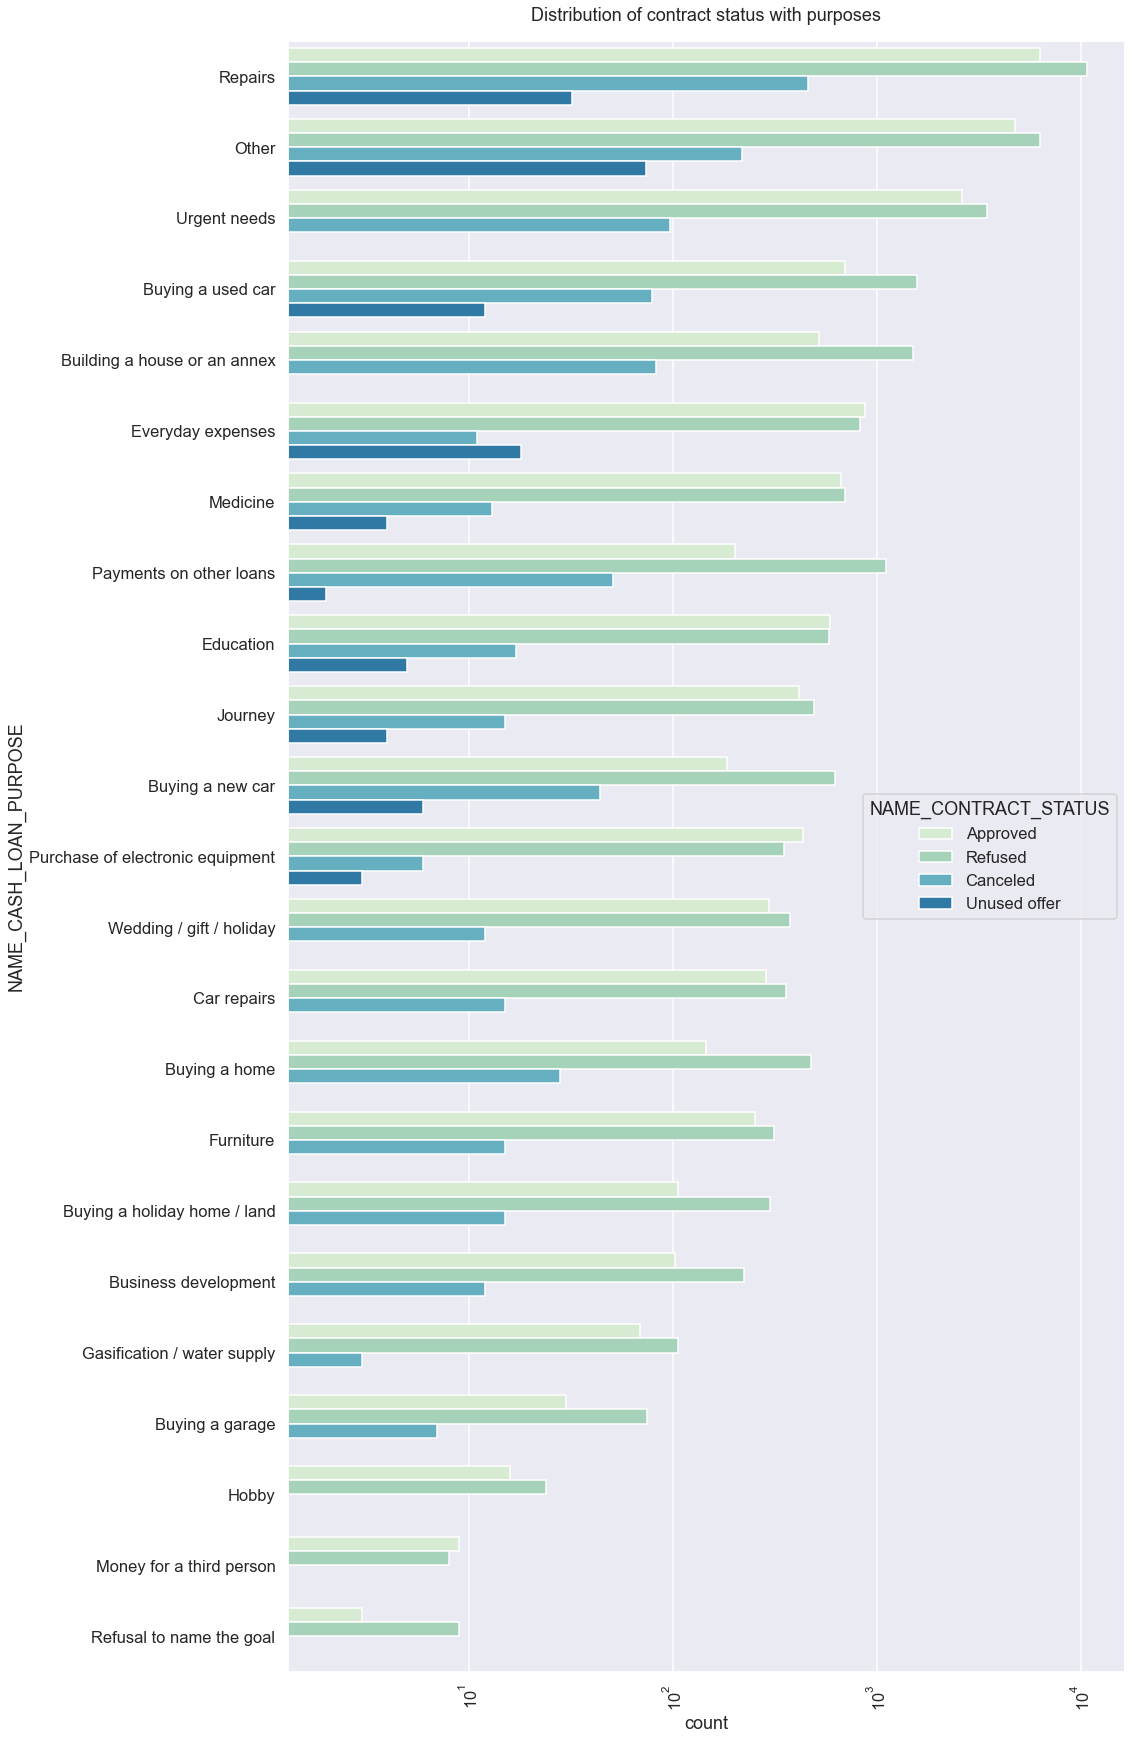

In [78]:
# plotting for loan purpose and status of loan

plot_count(data = app_prev, col= 'NAME_CASH_LOAN_PURPOSE', 
                   order = app_prev['NAME_CASH_LOAN_PURPOSE'].value_counts().index,title='Distribution of contract status with purposes',hue = 'NAME_CONTRACT_STATUS',palette='GnBu')

#### Inferences

- Around 10000 requests for “Repair” type loans and  “Payment on other loans” have been refused & holds highest rejections.

- 100+ requests for “Buying a home” and “Buying a home / land” have been approved.

- “Education” loan requests are balanced because they have equal number of approvals & rejections.

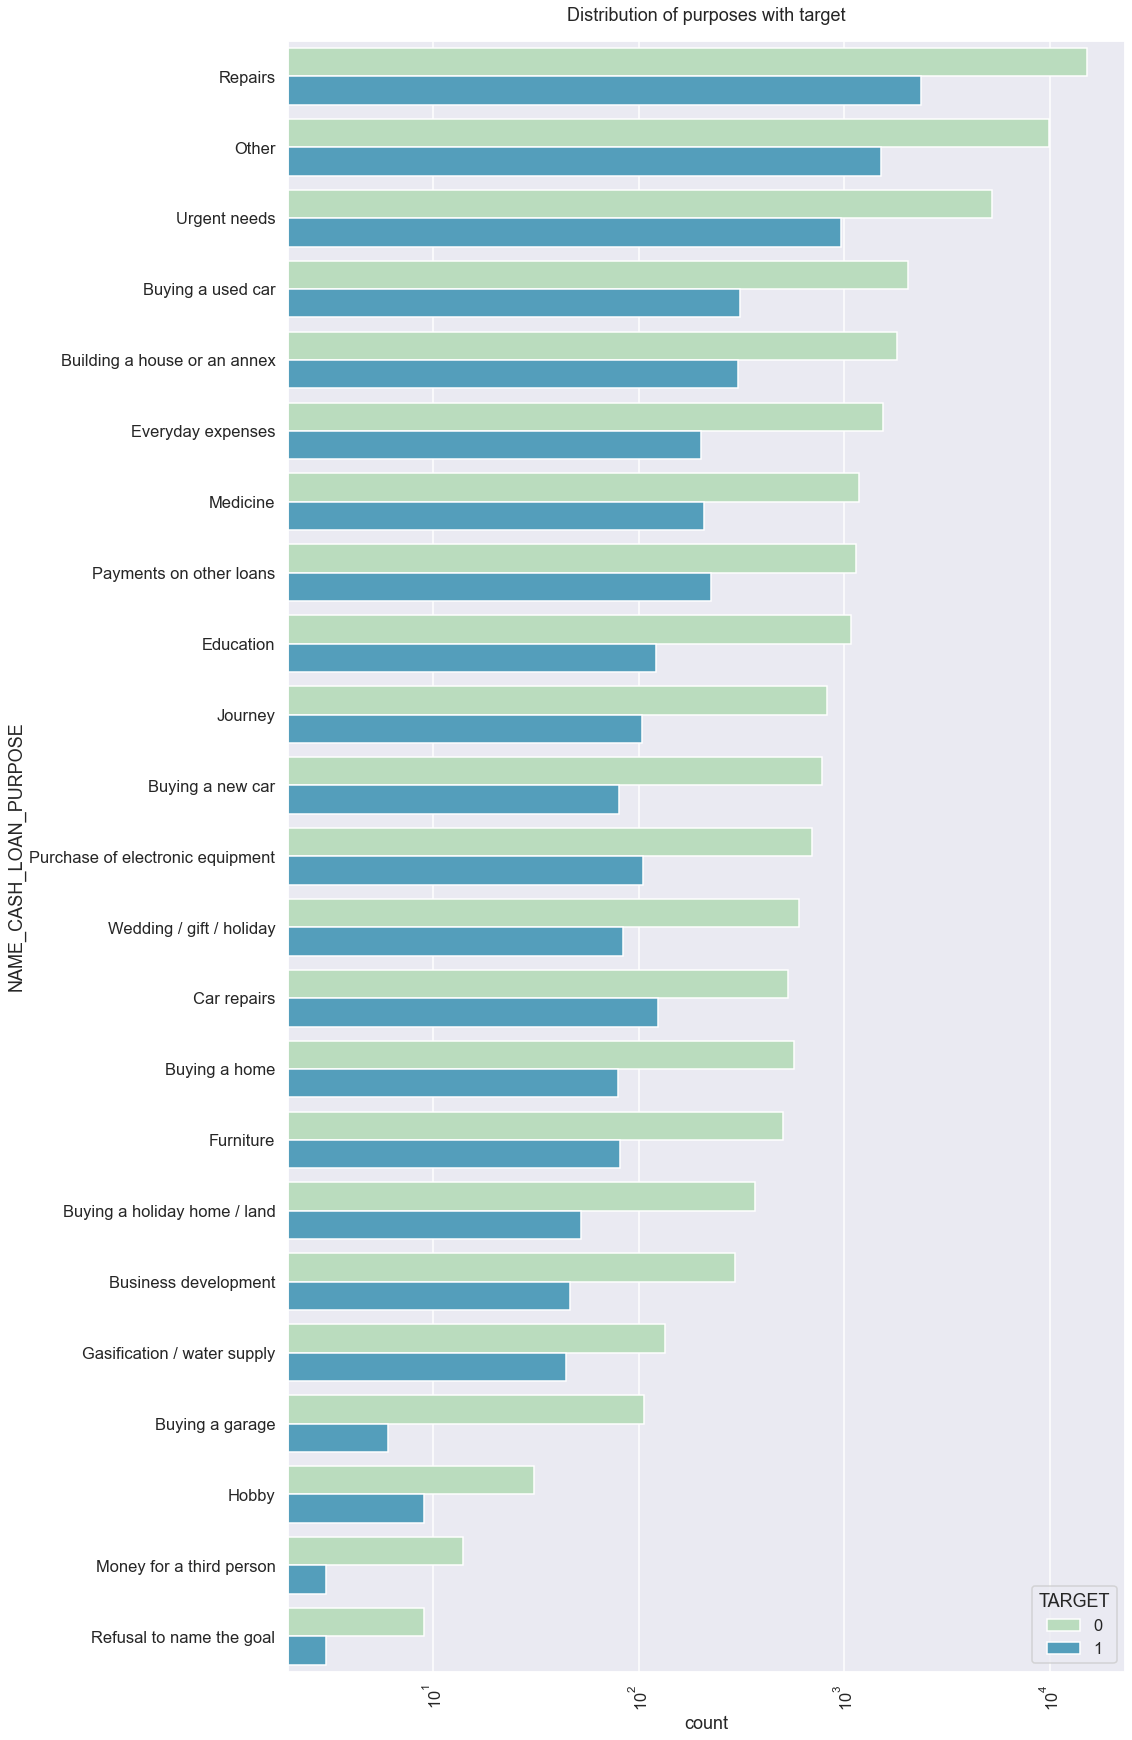

In [79]:
# Distribution of contract purpose


plot_count(data = app_prev, col= 'NAME_CASH_LOAN_PURPOSE', 
                   order = app_prev['NAME_CASH_LOAN_PURPOSE'].value_counts().index,title='Distribution of purposes with target',hue = 'TARGET',palette='GnBu')



#### Inferences:
- Loan purposes with 'Repairs' have more difficulites for  payment on time.
- Loan payment is significantly higher than facing difficulties for 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'.

#### Performing bivariate analysis

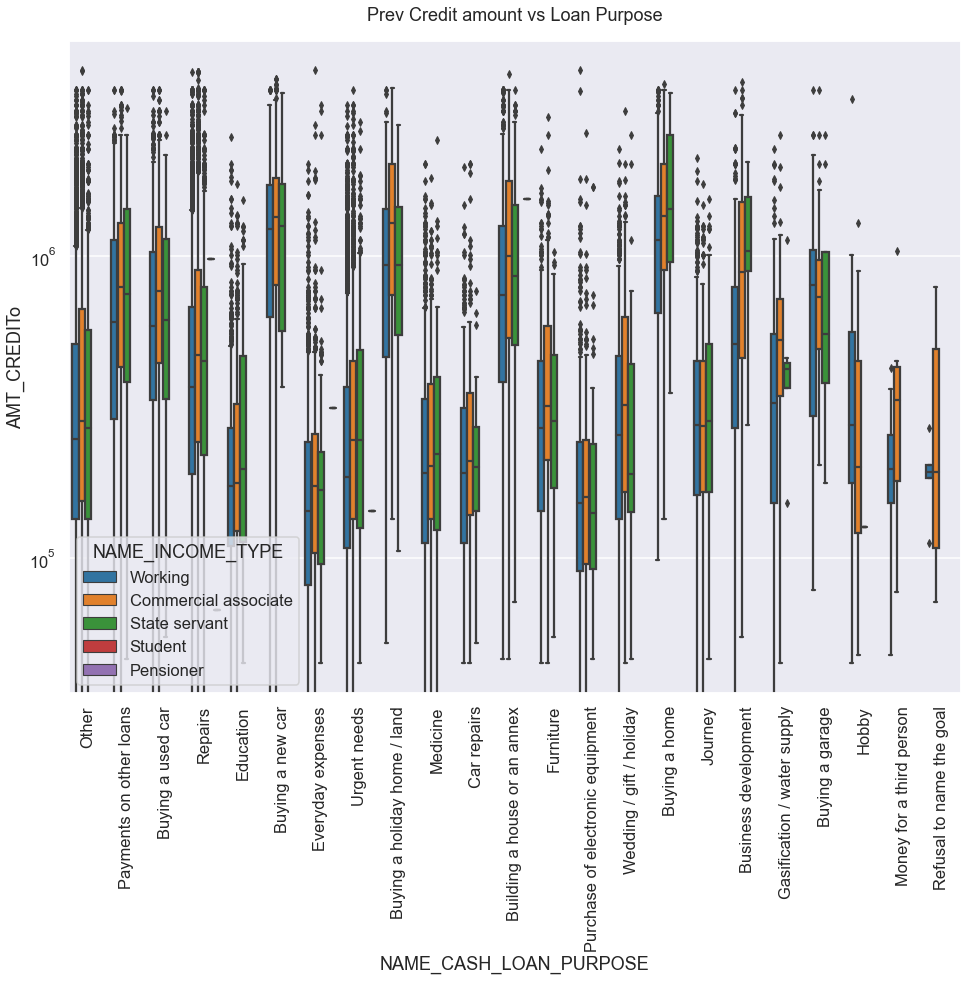

In [80]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =app_prev1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDITo',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()


#### Inferences
- For purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' ,the credit amount is higher.
- Income type of state servants have a significant amount of credit applied.

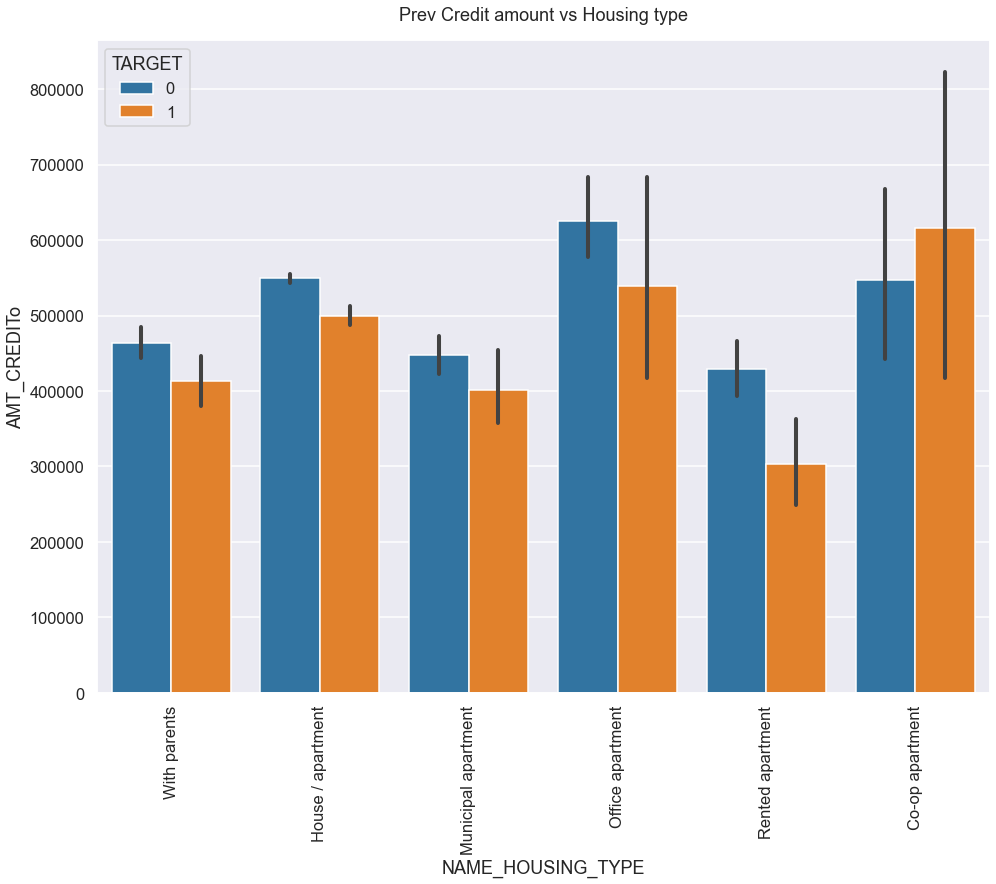

In [81]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =app_prev1, y='AMT_CREDITo',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

#### inference:
- Housing type and office appartment are having higher credit of Non-Defaulters and co-op apartment is having higher credit of Defaulters. 
- Hence, bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. 
- Bank can focus mostly on housing type with parents or House\appartment or municipal appartment for successful payments.

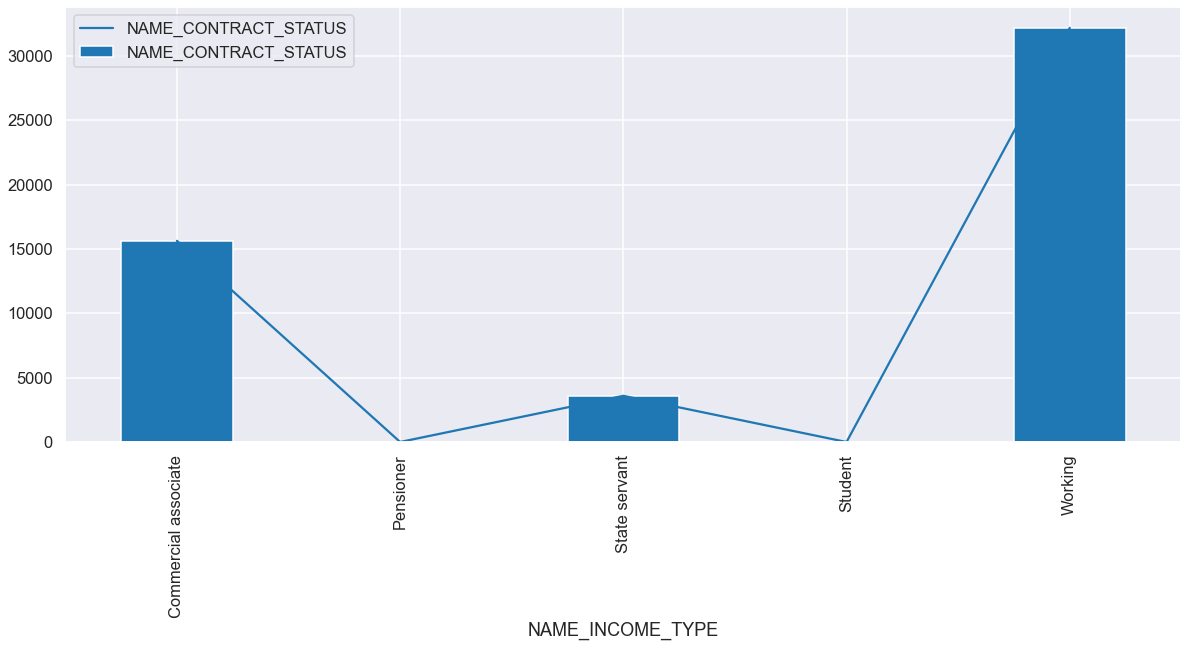

In [82]:
income_wise_loan_status = app_prev1.groupby(by= [app_prev1.NAME_INCOME_TYPE])[['NAME_CONTRACT_STATUS']].count()
income_wise_loan_status.rename(columns={"CONTRACT_STATUS": "count"},inplace=True)
ax =income_wise_loan_status.plot(figsize=(20,8))
income_wise_loan_status.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

##### Inference:
- Based on the income type , loans contract status shows that mostly status are approved for working, commercial associate and state servant

In [83]:
#Correlation Matrix for Numeric Variables
loan_corr = app_prev1.corr()
loan_corr

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                        1.000000      0.017403         -0.031490   
CNT_CHILDREN                  0.017403      1.000000         -0.014460   
AMT_INCOME_TOTAL             -0.031490     -0.014460          1.000000   
AMT_CREDIT                   -0.033006     -0.023187          0.356714   
AMT_ANNUITY                  -0.006961     -0.000375          0.430892   
AMT_GOODS_PRICE              -0.043009     -0.025938          0.361098   
REGION_POPULATION_RELATIVE   -0.058796     -0.020229          0.194335   
DAYS_BIRTH                    0.045120      0.296757         -0.071093   
DAYS_EMPLOYED                 0.074028      0.084408         -0.038780   
DAYS_REGISTRATION             0.045616      0.172582          0.012758   
DAYS_ID_PUBLISH               0.042739     -0.083803         -0.024995   
HOUR_APPR_PROCESS_START      -0.042552     -0.029378          0.070061   
EXT_SOURCE_2                 -0.182571     -0.027984          0.157348   
EXT_SOURCE_3                 -0.213192     -0.038361         -0.059966   
YEARS_BEGINEXPLUATATION_AVG  -0.015247      0.011087          0.015096   
FLOORSMAX_AVG                -0.072350     -0.027049          0.170244   
YEARS_BEGINEXPLUATATION_MODE -0.011191      0.009803          0.020479   
FLOORSMAX_MODE               -0.069433     -0.025431          0.161496   
YEARS_BEGINEXPLUATATION_MEDI -0.014805      0.010895          0.015098   
FLOORSMAX_MEDI               -0.070675     -0.026249          0.168082   
TOTALAREA_MODE               -0.046378     -0.013536          0.125742   
OBS_30_CNT_SOCIAL_CIRCLE      0.028805      0.033501         -0.023890   
DEF_30_CNT_SOCIAL_CIRCLE      0.027574      0.002096         -0.044242   
OBS_60_CNT_SOCIAL_CIRCLE      0.028459      0.032171         -0.023402   
DEF_60_CNT_SOCIAL_CIRCLE      0.023432      0.001728         -0.039818   
AMT_REQ_CREDIT_BUREAU_HOUR    0.003294     -0.005326          0.013455   
AMT_REQ_CREDIT_BUREAU_DAY     0.003857     -0.013018          0.009880   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.002239      0.011259          0.000858   
AMT_REQ_CREDIT_BUREAU_MON    -0.027120     -0.029892          0.065024   
AMT_REQ_CREDIT_BUREAU_QRT     0.014426     -0.015894          0.015346   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.004669     -0.024557          0.013354   
SK_ID_PREV                   -0.005804      0.001402          0.000997   
AMT_APPLICATION              -0.038449      0.010922          0.301027   
AMT_CREDITo                  -0.032881      0.014106          0.294829   
HOUR_APPR_PROCESS_STARTo     -0.038738     -0.025996          0.080708   
DAYS_DECISION                 0.059405      0.056109         -0.053207   
SELLERPLACE_AREA              0.018026      0.006473         -0.019887   

                              AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                         -0.033006    -0.006961        -0.043009   
CNT_CHILDREN                   -0.023187    -0.000375        -0.025938   
AMT_INCOME_TOTAL                0.356714     0.430892         0.361098   
AMT_CREDIT                      1.000000     0.737583         0.984824   
AMT_ANNUITY                     0.737583     1.000000         0.738888   
AMT_GOODS_PRICE                 0.984824     0.738888         1.000000   
REGION_POPULATION_RELATIVE      0.116913     0.126489         0.119754   
DAYS_BIRTH                     -0.136977    -0.061669        -0.129460   
DAYS_EMPLOYED                  -0.083892    -0.027918        -0.083860   
DAYS_REGISTRATION              -0.020723     0.025415        -0.017391   
DAYS_ID_PUBLISH                -0.006475     0.005231        -0.007771   
HOUR_APPR_PROCESS_START         0.044502     0.038026         0.052855   
EXT_SOURCE_2                    0.124699     0.112202         0.131805   
EXT_SOURCE_3                    0.050723     0.019709         0.056482   
YEARS_BEGINEXPLUATATION_AVG    -0.002262     0.016329         0.000583   
FLOORSMAX_AVG                   0.0

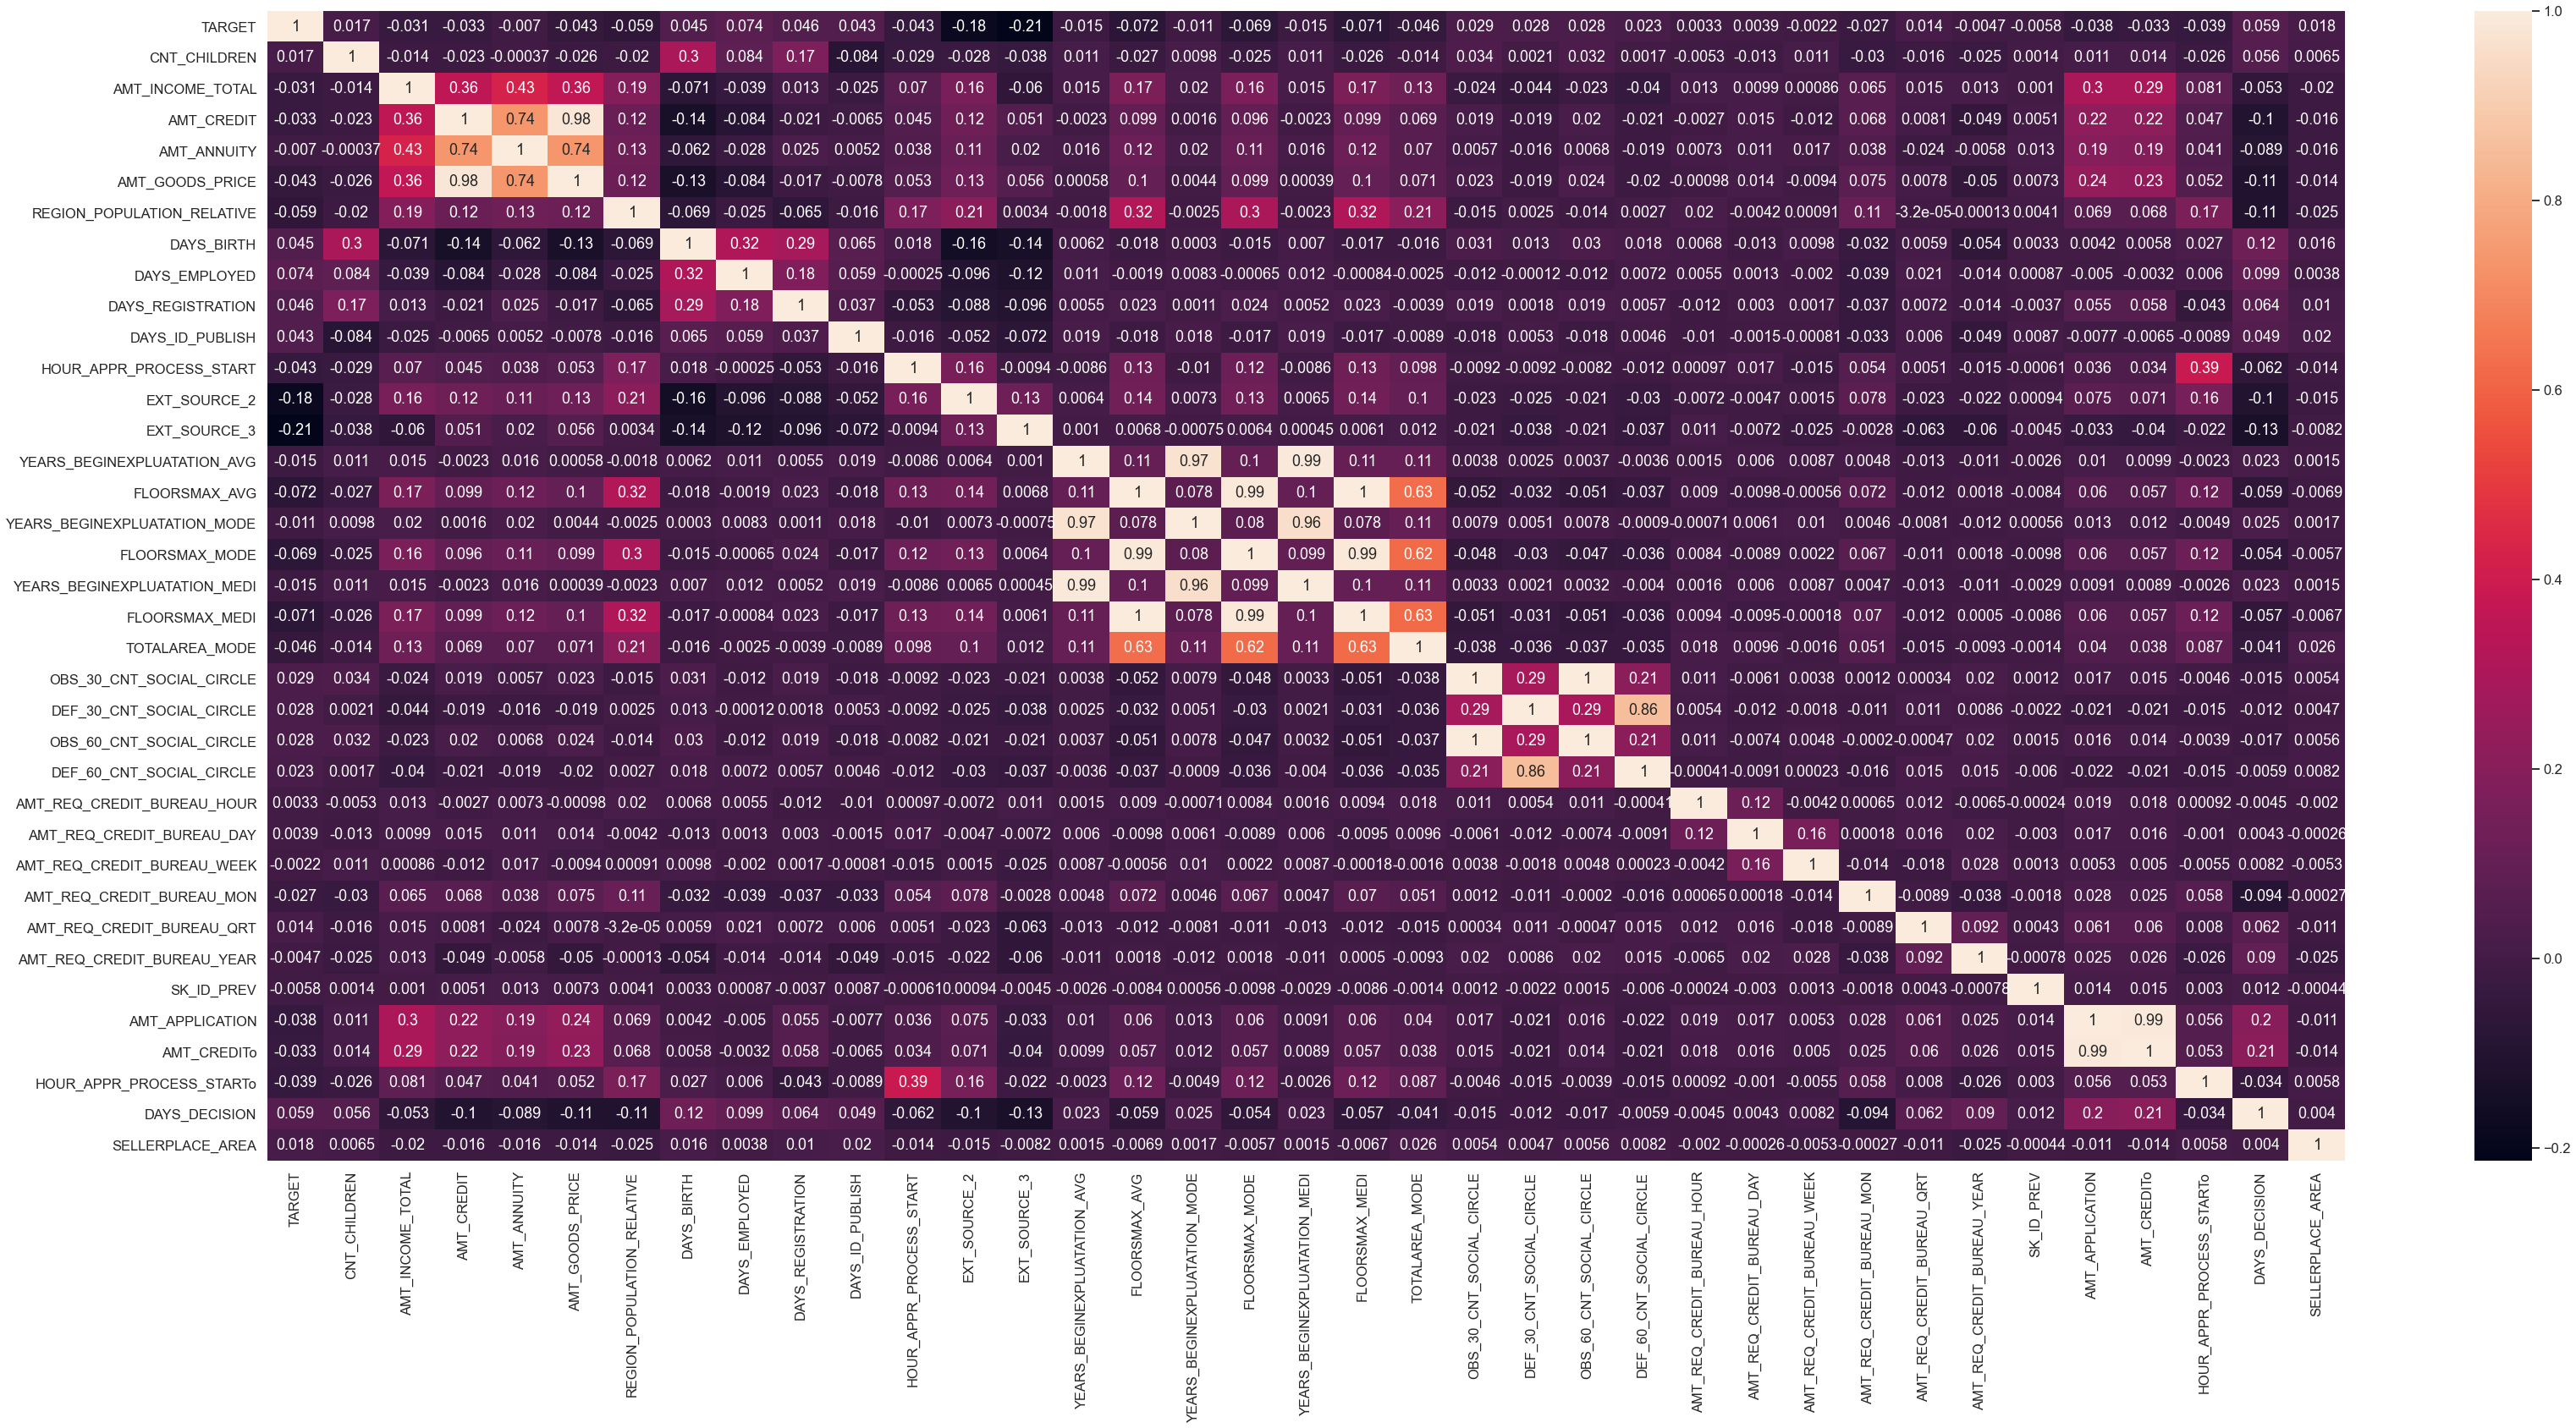

In [84]:
#plotting correlation
f, ax = plt.subplots(figsize=(55, 25))
sns.heatmap(loan_corr, 
            xticklabels=loan_corr.columns.values,
            yticklabels=loan_corr.columns.values,annot= True)
plt.show()

#### Inferences :

- From the above correlation we can say that Final credit amount on the previous application(AMT_CREDITo) has a high correlation with AMT_APPLICATION , for the amount which client initially applied.

- For consumer loans, higher the price of the goods given in exchange for loan, higher is the loan credited given to the customer

- Higher the Age of the customer, less is the credit amount given for loan.

- Amount credited is less if Number of enquiries to Credit Bureau about the client one day year is very high.

- Higher the count of children, less is the amount credited for loan.

- Higher the count of children , less is the total income.
